## 1.0 Introduction

Context

It is imperative that credit card companies including banking, finance, retail, and e-commerce companies are able to identify fraudulent credit card transactions so that customers are not charged for the products that they did not purchase.

Content

The dataset used for this project contains transactions that took place in two days, where out of 284,807 transactions, we have 284,315 non-fraudulent transactions and 492 fraudulent transactions. Hence, the dataset has class imbalanced. It contains transactions produced by credit cards in September 2013 by European Cardholders. 

The dataset contains only numerical input variables due to Principal Component Analysis (PCA) transformation. 
Furthermore, due to confidentiality issues, the original features and more background information about 
the data were not provided. It has 31 Features or Attributes including 28 PCA transformed Attributes 
and two attributes that are not transformed by PCA. The last feature is the response variable 
or variable of interest in this practicum project. The PCA transformed 28 Attributes are simply labelled V1, V2,...... to V27, V28.

The link to the Credit Card Fraud Detection Kaggle dataset is located at 
https://www.kaggle.com/mlg-ulb/creditcardfraud.


The following is a description of the Class (Response) Attribute as well as the two attributes that are not tranformed by PCA:

Time: Seconds elapsed between each transaction

Amount: Transaction Amount

Class: Response Variable with 0 as Non-Fraudulent and 1 as Fraudulent.







## 2.0 Required Libraries and dataset

In [1]:
# Load the pandas,numpy,matplotlib and other required libraries with an import statement
import pandas as pd                                   #importing pandas as pd
import numpy as np                                    #importing numpy as np
import matplotlib.pyplot as plt                       #importing matplotlib as plt
import seaborn as sns                                 #importing seaborn as sns
%matplotlib inline

In [2]:
# Load Credit Card Fraud Detection dataset into a pandas dataframe
df = pd.read_csv('creditcard.csv', sep=',')

In [3]:
# Display the first ten lines of the dataset
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
# Display the last few lines of the dataset
df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


The data is from two days transactions as highlighted by maximum Time value of 172792 seconds. 
This is approximately equal to 60x60x24x2 = 172800 seconds = 2 days.

In [5]:
# Find and Display the columns of a dataframe
df.keys()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
# Find the number of rows and columns in the dataset
# Check the dataset size
df.shape

(284807, 31)

The dataset contains 284807 transactions with 31 Attributes.

## Knowing Credit Card Fraud Detection dataset

In [7]:
# Display the summary of the dataframe including the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [8]:
# Checking the unique values
print(df.nunique())

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64


In [9]:
# Find the number of non-NA/null value across each column
df.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [10]:
# Find the number of NaN values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The above result shows the dataset has no missing values.

In [11]:
# Display data type of column
print(df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [12]:
# Descriptive or Summary statistics of numeric columns
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [15]:
# Frequency Counts of Attribute Class
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

The Transaction labelled with Class '0' depicts non-fraudulent Transaction and  Transaction labelled 
with Class '1' means fraudulent transaction. 
The above result shows there are 284,315 non-fraudulent transactions and 492 fraudulent transactions.
It is worth noting that Class Attribute is actually a categorical variable. 
Hence, it is a good idea to actually change the variable from int64 to categorical.

In [16]:
# Calculate and Display  Fraudulent and Non-Fraudulent Transactions Percentages
# Separate the data into Fraudulent and Non-Fraudulent 
Non_Fraudulent_Transactions = df[df['Class'] == 0]
Fraudulent_Transactions = df[df['Class'] == 1]

print(len(Non_Fraudulent_Transactions))
print(len(Fraudulent_Transactions))

284315
492


## Create meaningful Column names

To change the column names using rename function in Pandas, one needs to specify a mapper,
a dictionary with old name as keys and new name as values. We will also use inplace=True to
change column names in place.

This dataset has 31 Features or Attributes including 28 PCA transformed Attributes and two attributes 
that are not transformed by PCA. The last feature is the response variable or variable of interest 
in this practicum project. The PCA transformed 28 Attributes are simply labelled V1, V2,...... to V27, V28.

Hence, it is only necessary to provide meaningful column names to Time, Amount and Class columns.


In [18]:
# Change column names using rename function
df.rename(columns={'Time':'Time_in_Seconds',
'Amount':'Transaction_Amount', 
'Class':'Transaction_Class'},
inplace=True)



In [19]:
# Display the new column names
df.columns

Index(['Time_in_Seconds', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Transaction_Amount', 'Transaction_Class'],
      dtype='object')

In [20]:
# Frequency Counts of Attribute Class
df['Transaction_Class'].value_counts()

0    284315
1       492
Name: Transaction_Class, dtype: int64

## Change column types to appropriate data types

In [21]:
# Convert Transaction_Class from int64 to categorical
df['Transaction_Class'] = df.Transaction_Class.astype('category')

In [22]:
# Frequency Counts of Attribute Class
df['Transaction_Class'].value_counts()

0    284315
1       492
Name: Transaction_Class, dtype: int64

Transaction_Class has been successfully converted to categorical variable. 
0 is the categorical code for Non-Fraudulent Transaction and 1 is the categorical
code for Fraudulent Transaction.

In [23]:
# Display data type of column
print(df.dtypes)

Time_in_Seconds        float64
V1                     float64
V2                     float64
V3                     float64
V4                     float64
V5                     float64
V6                     float64
V7                     float64
V8                     float64
V9                     float64
V10                    float64
V11                    float64
V12                    float64
V13                    float64
V14                    float64
V15                    float64
V16                    float64
V17                    float64
V18                    float64
V19                    float64
V20                    float64
V21                    float64
V22                    float64
V23                    float64
V24                    float64
V25                    float64
V26                    float64
V27                    float64
V28                    float64
Transaction_Amount     float64
Transaction_Class     category
dtype: object


In [24]:
# Create a numerical Transaction_Class_id column based on Transaction_Class
df['Transaction_Class_id'] = pd.Categorical(df.Transaction_Class).codes

In [23]:
# Display data type of column
print(df.dtypes)

Time_in_Seconds          float64
V1                       float64
V2                       float64
V3                       float64
V4                       float64
V5                       float64
V6                       float64
V7                       float64
V8                       float64
V9                       float64
V10                      float64
V11                      float64
V12                      float64
V13                      float64
V14                      float64
V15                      float64
V16                      float64
V17                      float64
V18                      float64
V19                      float64
V20                      float64
V21                      float64
V22                      float64
V23                      float64
V24                      float64
V25                      float64
V26                      float64
V27                      float64
V28                      float64
Transaction_Amount       float64
Transactio

In [25]:
# Frequency Counts of Attribute Class
df['Transaction_Class_id'].value_counts()

0    284315
1       492
Name: Transaction_Class_id, dtype: int64

In [26]:
# Drop the Transaction_Class Column
df = df.drop(['Transaction_Class'],axis=1)

In [27]:
# Display the summary of the dataframe including the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time_in_Seconds         284807 non-null float64
V1                      284807 non-null float64
V2                      284807 non-null float64
V3                      284807 non-null float64
V4                      284807 non-null float64
V5                      284807 non-null float64
V6                      284807 non-null float64
V7                      284807 non-null float64
V8                      284807 non-null float64
V9                      284807 non-null float64
V10                     284807 non-null float64
V11                     284807 non-null float64
V12                     284807 non-null float64
V13                     284807 non-null float64
V14                     284807 non-null float64
V15                     284807 non-null float64
V16                     284807 non-null float64
V17                     284807 non-null float64
V18                     2

## Highlight the Imbalance Transaction Class Distribution

It is important to highlight the significant contrast within the Transaction Class. 
As expected, most of the transactions are Non-Fraudulent while only a very few 
transactions are Fraudulent Transactions.

In [28]:
# Frequency Counts of Attribute Class
df['Transaction_Class_id'].value_counts()

0    284315
1       492
Name: Transaction_Class_id, dtype: int64

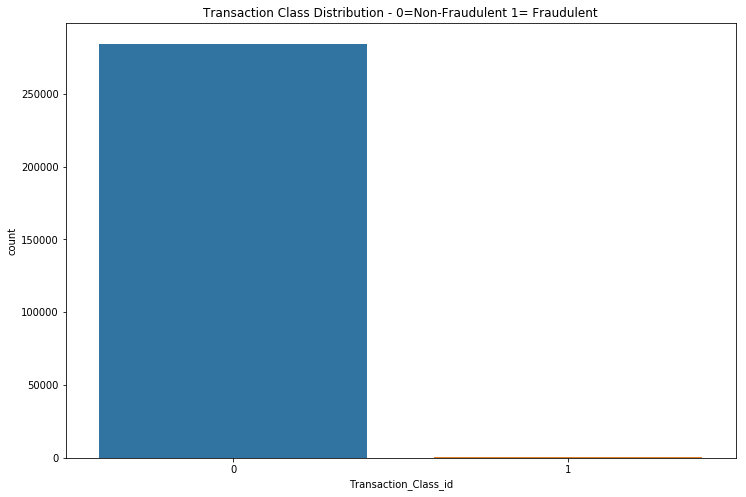

In [28]:
# Create countplot of Transaction Class - Non-Fraudulent vs Fraudulent
plt.figure(figsize=(12,8))
plt.title('Transaction Class Distribution - 0=Non-Fraudulent 1= Fraudulent')
sns.countplot(x= 'Transaction_Class_id', data = df)
plt.savefig('Transaction Class Distribution Countplot.pdf')


0 is the code for Non-Fraudulent Transaction and 1 is the code for Fraudulent Transaction.

In [29]:
# Calculate and Display  Fraudulent and Non-Fraudulent Transactions Percentages
 
Non_Fraudulent_Transactions = df[df['Transaction_Class_id'] == 0]
Fraudulent_Transactions = df[df['Transaction_Class_id'] == 1]

Non_Fraudulent_Transactions_Percentage = (len(Non_Fraudulent_Transactions) / float(len(df['Transaction_Class_id'])))*100
Fraudulent_Transactions_Percentage = (len(Fraudulent_Transactions) / float(len(df['Transaction_Class_id'])))*100

print ('Fraudulent Transactions Percentage: {}'.format(Fraudulent_Transactions_Percentage))
print ('Non-Fraudulent Transactions Percentage: {}'.format(Non_Fraudulent_Transactions_Percentage))

Fraudulent Transactions Percentage: 0.1727485630620034
Non-Fraudulent Transactions Percentage: 99.82725143693798


## Missing Values

It is important to identify and deal with missing values to get the dataset into a more useful form. 
Decision should be made on how to treat NaNs/missing values. 

Null values would result in bias resulting from differences between missing and complete data. 

The followings are some of the ways to deal with missing values in a dataset:
     - Deleting columns and rows with missing values
     - Replacing missing values with a mean, median or mode value for the column
     - A separate class can be created for missing values if this is useful for further data analysis
     - Replacing missing values with a constant(e.g. 0) that has meaning within the domain of the dataset 
       and further data analysis.

Fortunately enough, there are no missing values in this dataset. 
However, further steps below would be taken to confirm this.

In [30]:
## Checking for Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time_in_Seconds         284807 non-null float64
V1                      284807 non-null float64
V2                      284807 non-null float64
V3                      284807 non-null float64
V4                      284807 non-null float64
V5                      284807 non-null float64
V6                      284807 non-null float64
V7                      284807 non-null float64
V8                      284807 non-null float64
V9                      284807 non-null float64
V10                     284807 non-null float64
V11                     284807 non-null float64
V12                     284807 non-null float64
V13                     284807 non-null float64
V14                     284807 non-null float64
V15                     284807 non-null float64
V16                     284807 non-null float64
V17                     284807 non-null float64
V18                     2

In [33]:
## Display the number of missing values per column
df.isnull().sum()

Time_in_Seconds         0
V1                      0
V2                      0
V3                      0
V4                      0
V5                      0
V6                      0
V7                      0
V8                      0
V9                      0
V10                     0
V11                     0
V12                     0
V13                     0
V14                     0
V15                     0
V16                     0
V17                     0
V18                     0
V19                     0
V20                     0
V21                     0
V22                     0
V23                     0
V24                     0
V25                     0
V26                     0
V27                     0
V28                     0
Transaction_Amount      0
Transaction_Class_id    0
dtype: int64

## Outliers

The Outliers in this dataset would be detected by leveraging Z-score function defined in scipy library or lambda expression after temporarily removing the categorical class column from the dataset.

Leveraging either z function or lambda expression for outlier detection and removal would reduced the dataset to 246991 rows.

However, I decided to include the outliers in the dataset since I am dealing with PCA transformed data. I discovered outliers are better removed before transformation than after transformation. Hence, this project would proceed with entire dataset.

In [36]:
# Drop the Transaction_Class temporarily
df_out = df.drop('Transaction_Class_id',axis=1)

In [37]:
# Detect and remove outliers using scipy zscore
from scipy import stats
df_out[(np.abs(stats.zscore(df_out)) < 3).all(axis=1)]

,Time_in_Seconds,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Transaction_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68
10,10.0,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.387226,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80
11,10.0,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.125992,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99


In [38]:
# Detect and remove outliers using lambda expression
df_out = df.drop('Transaction_Class_id',axis=1)
df_out[df_out.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

,Time_in_Seconds,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Transaction_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68
10,10.0,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.387226,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80
11,10.0,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.125992,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99


In [39]:
# Copy pandas dataframe to another dataframe
credit_card_fraud_detection_df = df.copy()

In [40]:
# Display the first five lines of the dataframe
credit_card_fraud_detection_df.head()

,Time_in_Seconds,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Transaction_Amount,Transaction_Class_id
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [41]:
# Find the number of rows and columns in the dataframe
# Check the dataset size
credit_card_fraud_detection_df.shape

(284807, 31)

## Exploratory Data Analysis

Let us take a closer look at some of main characteristics of this dataset.

In [42]:
# Descriptive or Summary statistics of numeric columns
credit_card_fraud_detection_df.describe()

,Time_in_Seconds,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Transaction_Amount,Transaction_Class_id
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The result above shows the data is from two days transactions as highlighted by maximum Time value of 172792 seconds. 
This is approximately equal to 60x60x24x2 = 172800 seconds = 2 days. Furthermore, the minimum Transaction Amount is 0.0 
and maximum amount is 25691.16. The mean Transaction Amount is 88.35.

In [43]:
# Descriptive or Summary statistics of numeric columns
Fraudulent_Transactions.describe()

,Time_in_Seconds,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Transaction_Amount,Transaction_Class_id
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


From the above Fraudulent Transaction Class summary statistics, the minimum Transaction Amount is 0.0, 
maximum Transaction Amount is 2125.87 and the mean Transaction Amount is 122.21. 
Hence, it can be inferred that an average of 122 is lost to Fraudulent Transaction.

In [44]:
# Descriptive or Summary statistics of numeric columns
Non_Fraudulent_Transactions.describe()

,Time_in_Seconds,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Transaction_Amount,Transaction_Class_id
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


From the above Non-Fraudulent Transaction Class summary statistics, the minimum Transaction Amount is 0.0,
maximum Transaction Amount is 25691 and the mean Transaction Amount is 88.29. 
Hence, the average amount for Non-Transaction is 88.29.

In [45]:
# Frequency counts of Transaction Amount
credit_card_fraud_detection_df['Transaction_Amount'].value_counts().nlargest(20)

1.00     13688
1.98      6044
0.89      4872
9.99      4747
15.00     3280
0.76      2998
10.00     2950
1.29      2892
1.79      2623
0.99      2304
20.00     2002
0.00      1825
8.99      1811
11.50     1741
4.49      1579
5.00      1569
0.77      1443
2.69      1436
25.00     1388
50.00     1341
Name: Transaction_Amount, dtype: int64

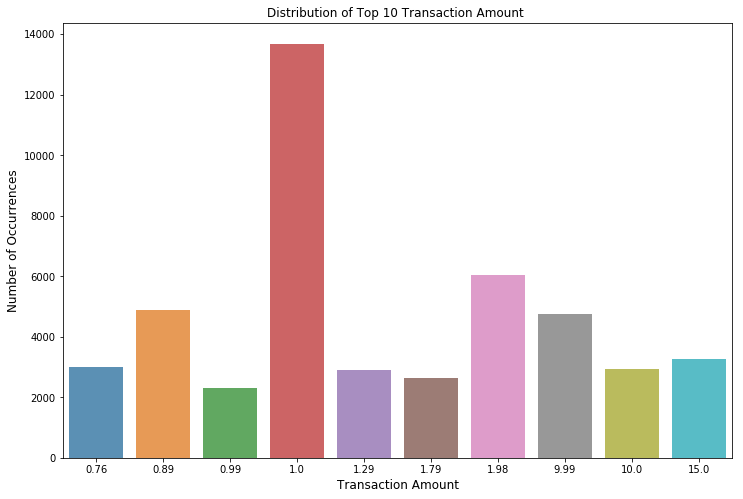

In [46]:
# Plotting a bar graph of the top 10 Transaction Amount
Transaction_Amount_Count = credit_card_fraud_detection_df['Transaction_Amount'].value_counts()
Transaction_Amount_Count = Transaction_Amount_Count[:10,]
plt.figure(figsize=(12,8))
sns.barplot(Transaction_Amount_Count.index, Transaction_Amount_Count.values, alpha=0.8)
plt.title('Distribution of Top 10 Transaction Amount ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Transaction Amount', fontsize=12)
plt.savefig('Top 10 Transaction Amount plot.pdf')
plt.show()

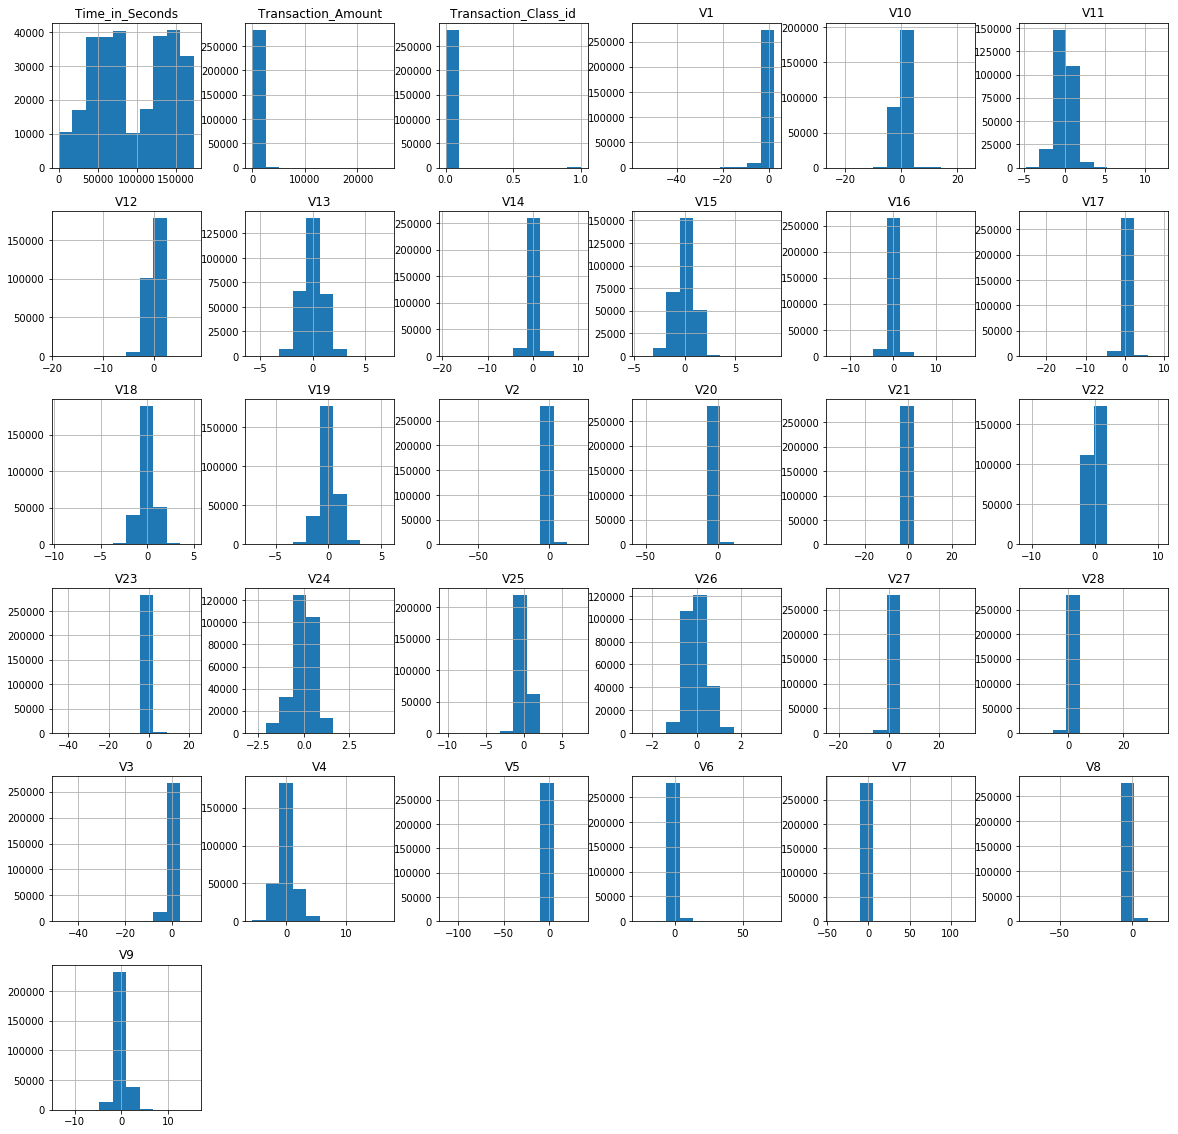

In [47]:
# Plot Histogram of each parameter for Credit Card Fraud Detection
credit_card_fraud_detection_df.hist(figsize = (20,20))
plt.savefig('Histogram of each parameter for Credit Card Fraud Detection.pdf')
plt.show()

## Frequency Count of Fraudulent and Non-Fraudulent Transactions

In [48]:
# Find the number of rows and columns in Fraudulent dataset
# Check the dataset size
Fraudulent_Transactions.shape

(492, 31)

In [49]:
# Frequency counts of Fraudulent Transaction Amount
Fraudulent_Transactions['Transaction_Amount'].value_counts().nlargest(20)

1.00      113
0.00       27
99.99      27
0.76       17
0.77       10
0.01        5
2.00        4
3.79        4
1.10        3
2.28        3
12.31       3
1.18        3
0.68        3
723.21      2
188.52      2
94.82       2
0.83        2
88.23       2
7.59        2
1.63        2
Name: Transaction_Amount, dtype: int64

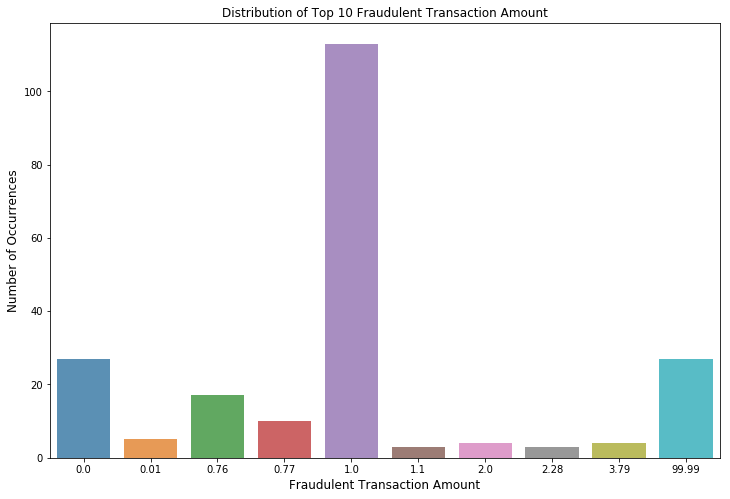

In [50]:
# Plotting a bar graph of the top 10 Fraudulent Transaction Amount
Fraudulent_Transactions_Count = Fraudulent_Transactions['Transaction_Amount'].value_counts()
Fraudulent_Transactions_Count = Fraudulent_Transactions_Count[:10,]
plt.figure(figsize=(12,8))
sns.barplot(Fraudulent_Transactions_Count.index, Fraudulent_Transactions_Count.values, alpha=0.8)
plt.title('Distribution of Top 10 Fraudulent Transaction Amount')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Fraudulent Transaction Amount', fontsize=12)
plt.savefig('Top 10 Fraudulent Transaction Amount plot.pdf')
plt.show()

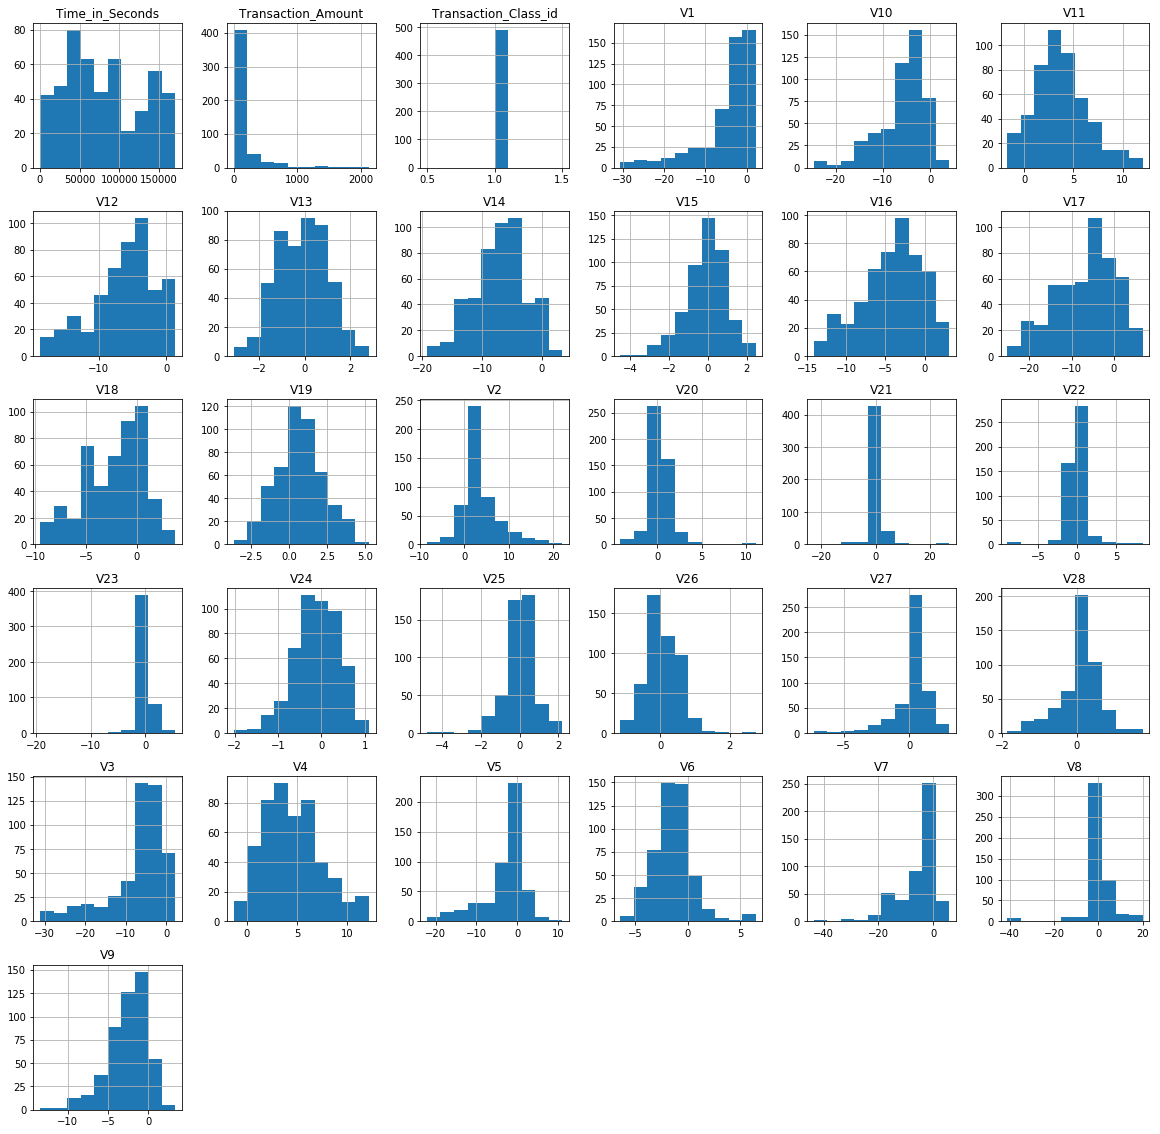

In [51]:
#Plot Histogram of each parameter for Fraudulent Transactions
Fraudulent_Transactions.hist(figsize = (20,20))
plt.savefig('Histogram of each parameter for Fraudulent Transactions.pdf')
plt.show()

In [52]:
# Find the number of rows and columns in the Non-Frauduluent dataset
# Check the dataset size
Non_Fraudulent_Transactions.shape

(284315, 31)

In [53]:
# Frequency counts of Non-Fraudulent Transaction Amount
Non_Fraudulent_Transactions['Transaction_Amount'].value_counts().nlargest(20)

1.00     13575
1.98      6044
0.89      4872
9.99      4746
15.00     3280
0.76      2981
10.00     2950
1.29      2892
1.79      2622
0.99      2304
20.00     2002
8.99      1811
0.00      1798
11.50     1741
4.49      1578
5.00      1568
2.69      1436
0.77      1433
25.00     1387
50.00     1340
Name: Transaction_Amount, dtype: int64

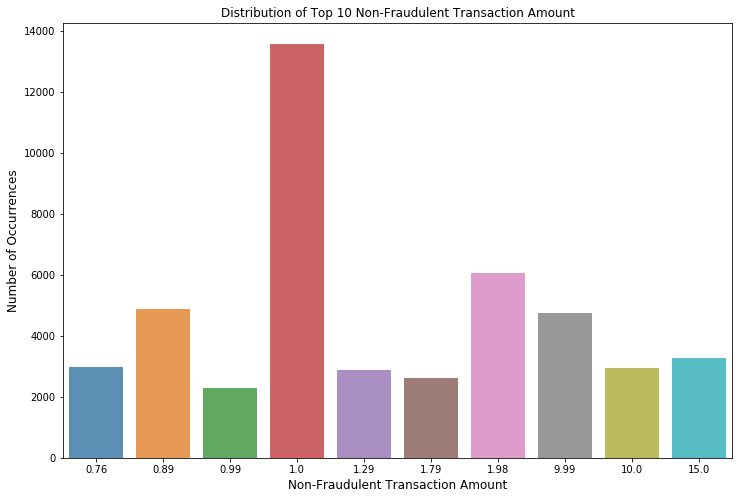

In [55]:
# Plotting a bar graph of the top 10 Non-Fraudulent Transaction Amount
Non_Fraudulent_Transactions_Count = Non_Fraudulent_Transactions['Transaction_Amount'].value_counts()
Non_Fraudulent_Transactions_Count = Non_Fraudulent_Transactions_Count[:10,]
plt.figure(figsize=(12,8))
sns.barplot(Non_Fraudulent_Transactions_Count.index, Non_Fraudulent_Transactions_Count.values, alpha=0.8)
plt.title('Distribution of Top 10 Non-Fraudulent Transaction Amount')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Non-Fraudulent Transaction Amount', fontsize=12)
plt.savefig('Top 10 Non-Fraudulent Transaction Amount plot.pdf')
plt.show()


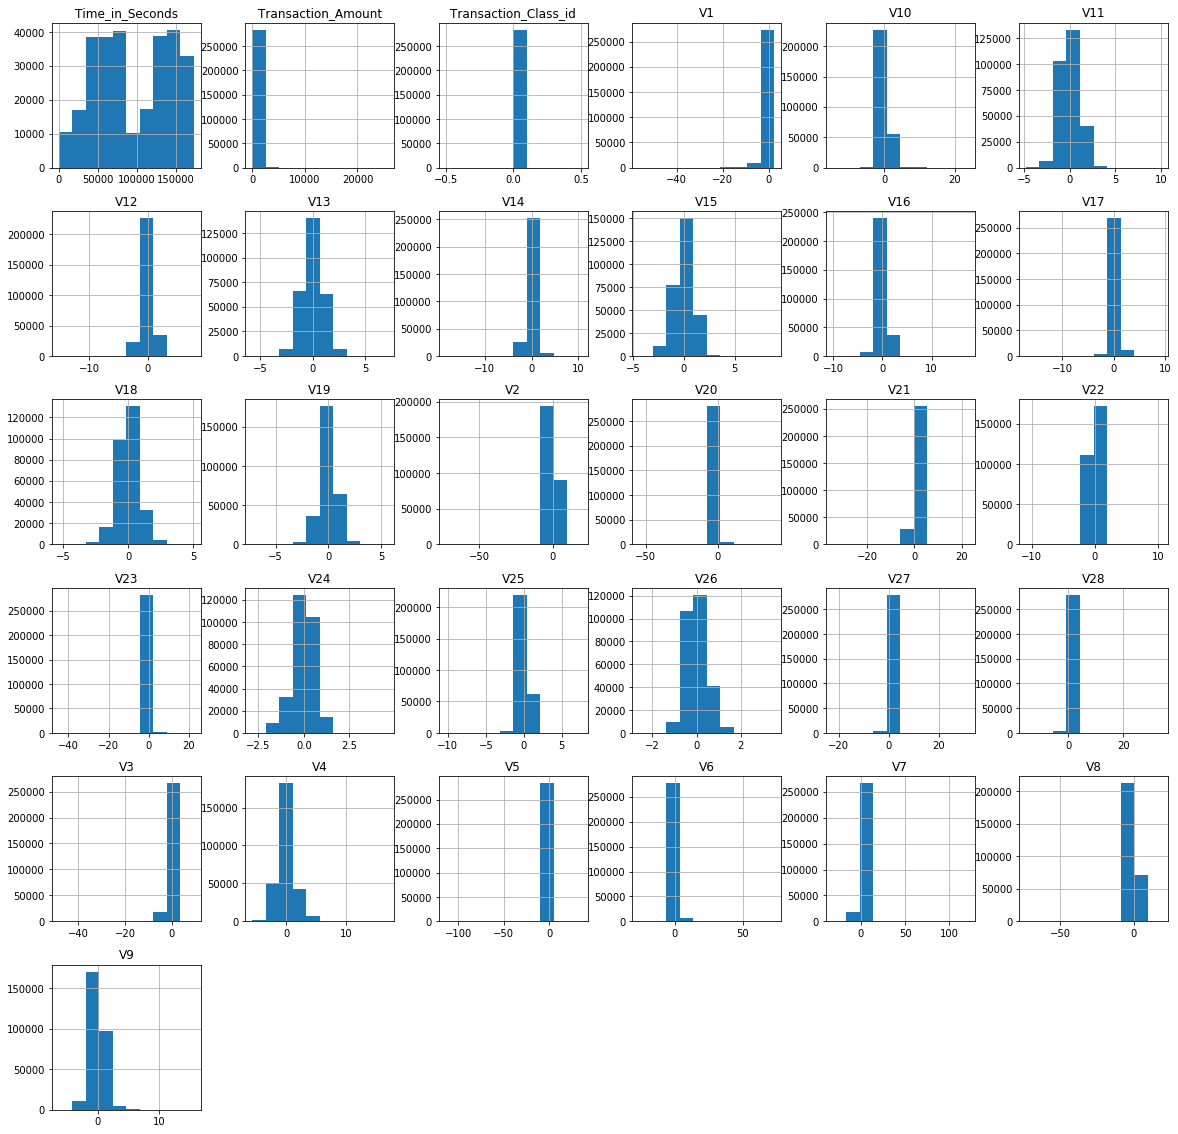

In [56]:
# Plot Histogram of each parameter for Non-Fraudulent Transactions
Non_Fraudulent_Transactions.hist(figsize = (20,20))
plt.savefig('Histogram of each parameter for Non-Fraudulent Transactions.pdf')
plt.show()


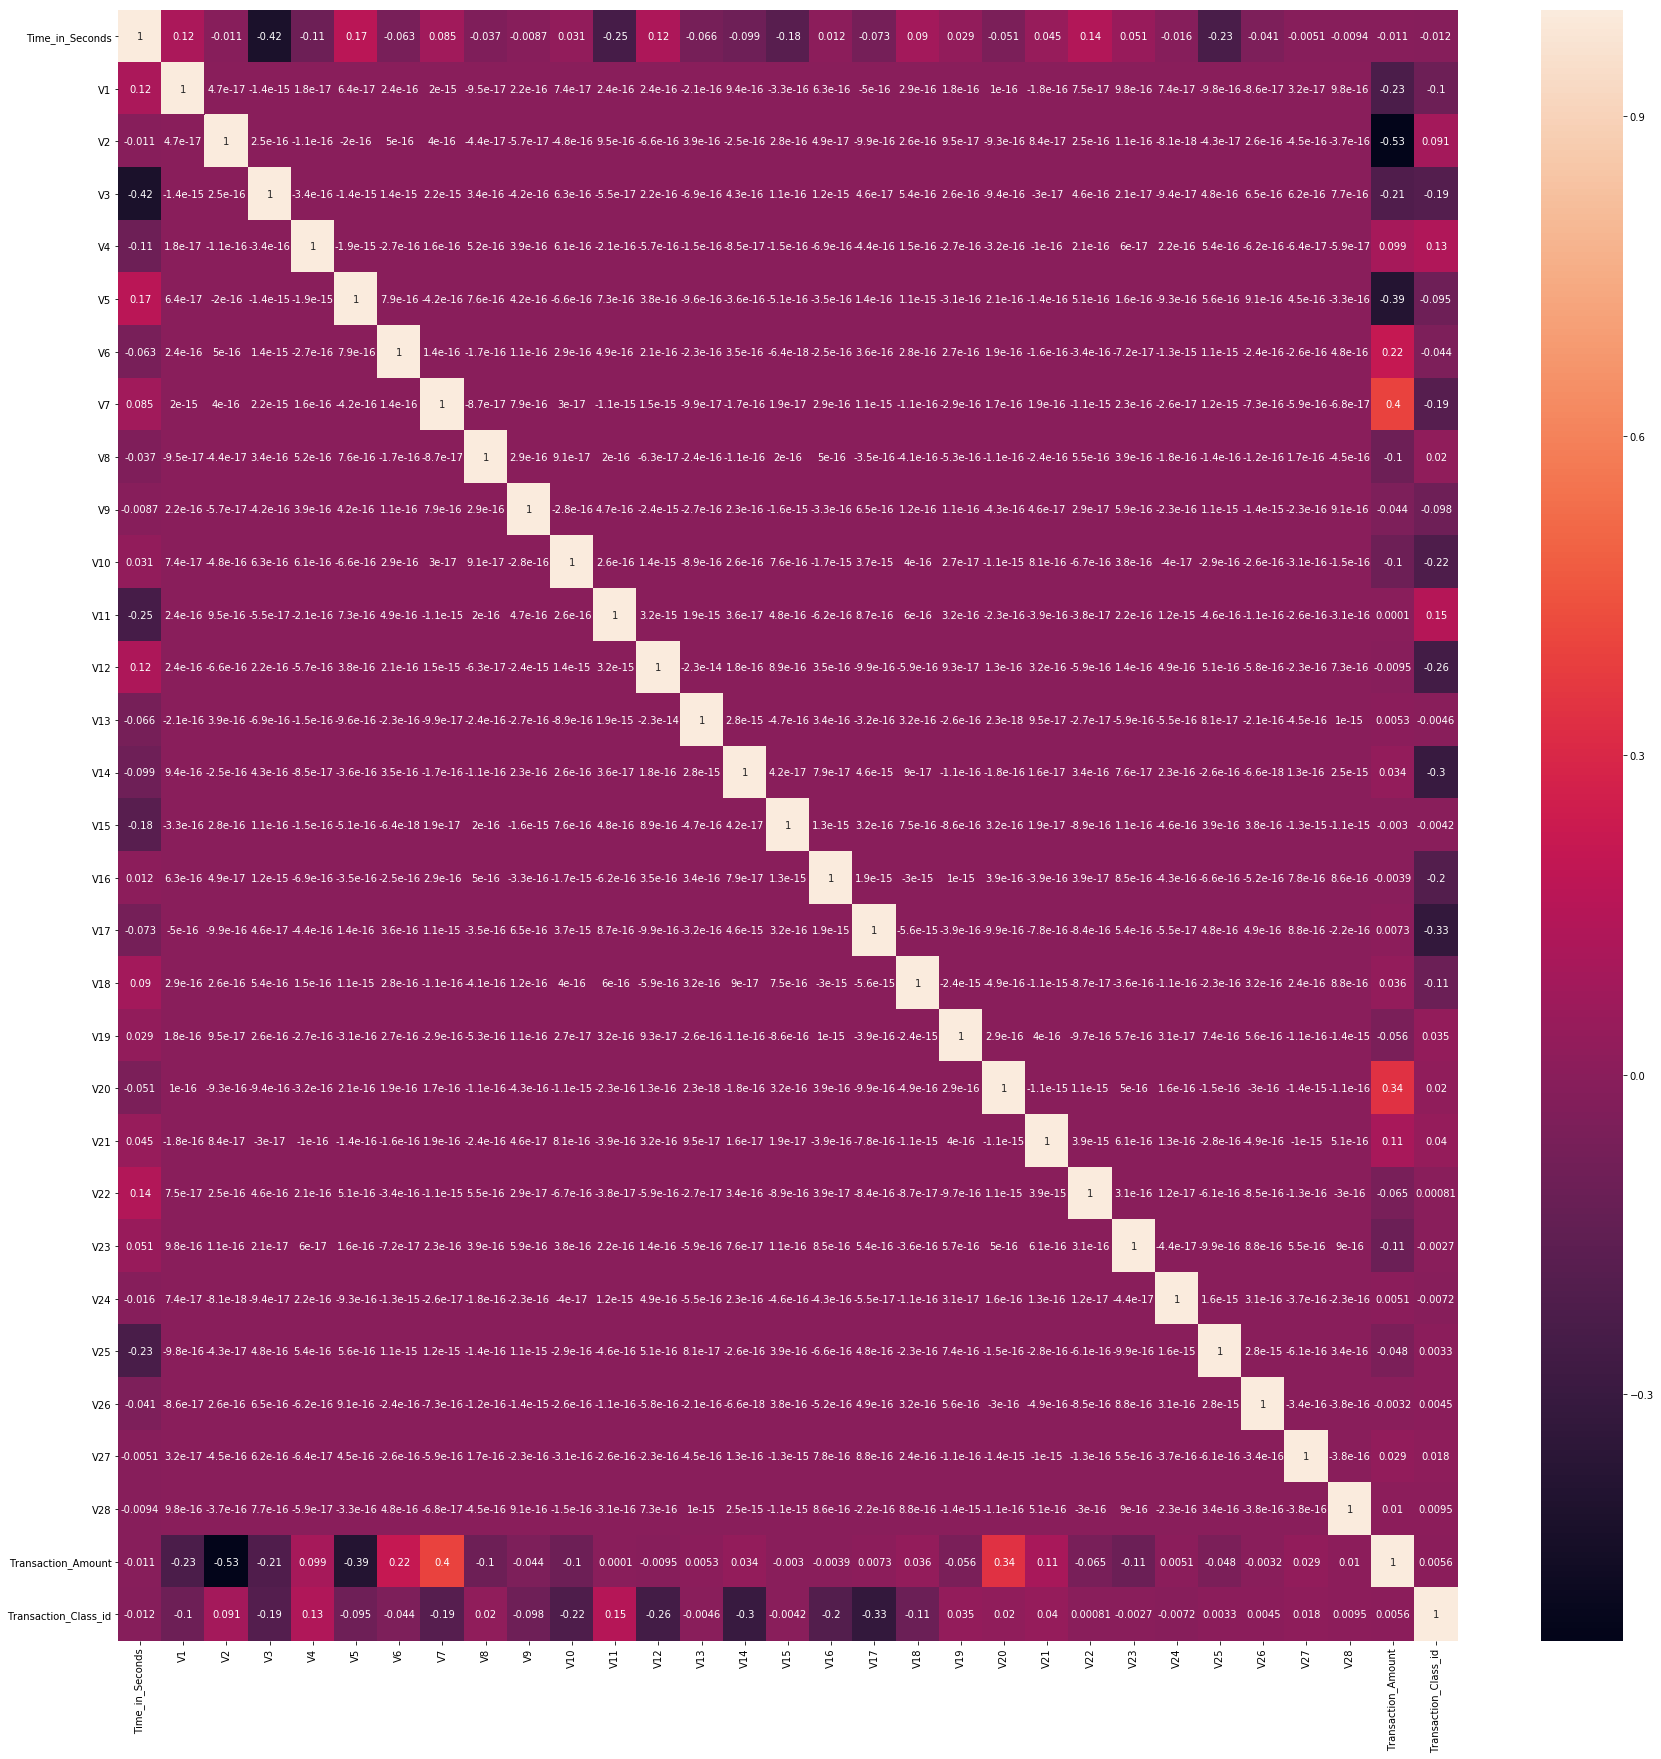

In [57]:
# Correlation of Data - Visualize potential relationship among 
# the credit card fraud detection attributes
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(credit_card_fraud_detection_df.corr(), annot=True)
plt.savefig('Correlation of Credit Card Fraud Detection Data .pdf')

Correlation reveals if there is any association between the features. However, from the above correlation matrix, it seems there is no significant correlation among the PCA features - V1 to V28. 

In [58]:
# Correlation using .corr() method - Matrix table of relationship among 
# the credit card fraud detection attributes
credit_card_fraud_detection_df.corr()

,Time_in_Seconds,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Transaction_Amount,Transaction_Class_id
Time_in_Seconds,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


## Feature Selection

 The following showcases the importance of features on the Transaction Class. The performance of a classification model is greatly affected by feature selection. Model Performance can be negatively affected by irrelevant or partially pertinent features.

In [62]:
# Separate the dataset into Predictors(Features or Inputs) and Target (Response Variable)
X = credit_card_fraud_detection_df.drop('Transaction_Class_id', axis = 1 ) 
y = credit_card_fraud_detection_df['Transaction_Class_id']

In [63]:
X.head(10)

,Time_in_Seconds,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Transaction_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68


In [64]:
# Display the first 10 lines of the dataset
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Transaction_Class_id, dtype: int8

In [65]:
# Import SelectKBest and Chisquare from Scikit Learn feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [66]:
# Leverage SelectKBest class to extract the top 20 best features 
bestfeatures = SelectKBest(score_func=f_classif, k=20)
fit = bestfeatures.fit(X,y)
credit_card_fraud_detection_dfscores = pd.DataFrame(fit.scores_)
credit_card_fraud_detection_dfcolumns = pd.DataFrame(X.columns)

In [67]:
# Join both credit_card_fraud_detection_dfscores & credit_card_fraud_detection_dfcolumns dataframes for better visualization
featureScores = pd.concat([credit_card_fraud_detection_dfcolumns,credit_card_fraud_detection_dfscores],axis=1)

In [68]:
# Assign columns to the dataframe
featureScores.columns = ['Features','Score']

In [69]:
# Display the order of importance of the features
print(featureScores.nlargest(30,'Score'))

              Features         Score
17                 V17  33979.168593
14                 V14  28695.547788
12                 V12  20749.822361
10                 V10  14057.979985
16                 V16  11443.349428
3                   V3  11014.508305
7                   V7  10349.605408
11                 V11   6999.355047
4                   V4   5163.832114
18                 V18   3584.380605
1                   V1   2955.668946
9                   V9   2746.600273
5                   V5   2592.357929
2                   V2   2393.401678
6                   V6    543.510578
21                 V21    465.916251
19                 V19    344.990997
20                 V20    114.999731
8                   V8    112.548287
27                 V27     88.045296
0      Time_in_Seconds     43.252998
28                 V28     25.901405
24                 V24     14.850932
29  Transaction_Amount      9.033345
13                 V13      5.947672
26                 V26      5.653653
1

The above result identifies features V17,V14,V12,V10 and V16 as the top five features to facilitate the classification of a transaction as either a non-fraudulent or fraudulent transaction.

## Feature Scaling - Standardizing the data

It is worth noting that variable like Amount has a wide range of values. As can be observed from the summary statistics result above. Transaction Amount has a minimum value of 0.0 and maximum value of 25691.16. Furthermore, it should be noted that some machine learning algorithms would not estimate correct result without the standard normally distributed data. Hence, the need to leverage StandardScaler method or function from scikit-learn to standardize or normalize Transaction Amount value. Features V1,V2, ....V28 are already transformed using the PCA.

After careful observation, the Time in Seconds variable is only a measure of time frame during which this transaction data was collected. It is not really a factor or feature in determining whether a transaction is fraudulent or not. Hence, it would be dropped from further data analysis.

In [70]:
# Import StandardScaler 
from sklearn.preprocessing import StandardScaler

In [71]:
# Normalize or Transform Transaction Amount Variable
credit_card_fraud_detection_df['Normalized_Transaction_Amount'] = StandardScaler().fit_transform(credit_card_fraud_detection_df['Transaction_Amount'].values.reshape(-1,1))

In [72]:
# Display the first ten lines of the dataset
credit_card_fraud_detection_df.head(10)

,Time_in_Seconds,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Transaction_Amount,Transaction_Class_id,Normalized_Transaction_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,-0.338556
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0,-0.333279
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,-0.190107
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0,0.019392
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0,-0.338516


In [73]:
# Swap two columns - Transaction_Class_id & Normalized_Transaction_Amount
df1 = credit_card_fraud_detection_df.pop('Normalized_Transaction_Amount')  # remove Normalized_Transaction_Amount and store it in df1
df2 = credit_card_fraud_detection_df.pop('Transaction_Class_id')           # remove Transaction_Class_id and store it in df2
credit_card_fraud_detection_df['Normalized_Transaction_Amount']=df1        # add Normalized_Transaction_Amount as a new column.
credit_card_fraud_detection_df['Transaction_Class_id']=df2                 # add Transaction_Class_id as a new column

In [74]:
# Display the first ten lines of the dataset
credit_card_fraud_detection_df.head(10)

,Time_in_Seconds,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Transaction_Amount,Normalized_Transaction_Amount,Transaction_Class_id
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,-0.073403,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,-0.338556,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,-0.333279,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,-0.190107,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.019392,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,-0.338516,0


In [75]:
# Find the number of rows and columns in the dataframe
# Check the dataset size
credit_card_fraud_detection_df.shape

(284807, 32)

In [76]:
# Separate dataset again into Fraudulent and Non-Fraudulent after Transaction_Amount Normalization 
Non_Fraudulent_Transactions = credit_card_fraud_detection_df[credit_card_fraud_detection_df['Transaction_Class_id'] == 0]
Fraudulent_Transactions = credit_card_fraud_detection_df[credit_card_fraud_detection_df['Transaction_Class_id'] == 1]

In [77]:
# Find the number of rows and columns in the dataframe
# Check the Non_Fraudulent_Transactions dataset size
Non_Fraudulent_Transactions.shape

(284315, 32)

In [78]:
# Find the number of rows and columns in the dataframe
# Check the Fraudulent_Transactions dataset size
Fraudulent_Transactions.shape

(492, 32)

## Classification Predictive Baseline Training models

In this project, five supervised classification predictive models would be developed for credit card fraud detection. These models would be constructed leveraging supervised machine learning techniques including Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, Random Forest and Extreme Gradient Boosting (XGB).

It is worth noting that simpler evaluation metric like accuracy score would be misleading to use when dealing with this imbalanced dataset. Machine learning trained classifiers would always predicts the most common class if no further features analysis is performed. There is an initial bias towards the prevalent class. Also, accuracy score should not be used as evaluation metric for this project due to insensitivity to false negatives. Hence, performance metrics including precision, recall, f1-score are more meaningful and suitable for this unbalanced classification task.

In [79]:
# Import the required libraries for the splitting the data and for model trainings
# Import train_test_split
from sklearn.model_selection import train_test_split

# import metrics
from sklearn import metrics

In [80]:
# Separate the dataset into Predictors(Features or Inputs) and Target (Response)datasets
# Both Time_in_Seconds and Transaction_Amount are dropped from the Features
X = credit_card_fraud_detection_df.drop(['Time_in_Seconds', 'Transaction_Amount','Transaction_Class_id'], axis = 1 )
y = credit_card_fraud_detection_df['Transaction_Class_id']

In [81]:
# Display unique Transaction Class we have to predict
credit_card_fraud_detection_df['Transaction_Class_id'].unique()

array([0, 1], dtype=int64)

In [82]:
# Split the data into train test datasets leveraging train_test_split method
# Set test_size=0.30, random_state=42
# Leverage Shuffle the data to do away with any Initial Bias
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

In [83]:
# Display the number of rows and columns of the train and test data
print("X_train.shape: ", X_train.shape )
print("X_test.shape: ", X_test.shape )
print("y_train.shape: ", y_train.shape )
print("y_test.shape: ", y_test.shape )


X_train.shape:  (199364, 29)
X_test.shape:  (85443, 29)
y_train.shape:  (199364,)
y_test.shape:  (85443,)


## Undersampling Non_Fraudulent_Transactions

Undersampling is a resampling techniques for handling imbalanced data whereby we randomly select a number of observations from the majority (Non-Fraudulent) class to match the number of observations in the minority (Fraudulent) class. Hence, we have a balanced dataset.

In this project, undersampling would be performed by randomly selecting 492 observations from non-fraudulent class to match the number of observations in the fraudulent transaction class.

In [84]:
# import resample module from Scikit-Learn
from sklearn.utils import resample

In [85]:
# Non-Fraudulent is the Majority Class
# Display the number of rows and columns for Non_Fraudulent Transactions
Non_Fraudulent_Transactions.shape

(284315, 32)

In [86]:
# Fraudulent is the Minority Class
# Display the number of rows and columns for Non_Fraudulent Transactions
Fraudulent_Transactions.shape

(492, 32)

In [87]:
# Display the first ten lines of the dataset
Non_Fraudulent_Transactions.head(10)

,Time_in_Seconds,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Transaction_Amount,Normalized_Transaction_Amount,Transaction_Class_id
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,-0.073403,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,-0.338556,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,-0.333279,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,-0.190107,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.019392,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,-0.338516,0


In [88]:
# Display the first ten lines of the dataset
Fraudulent_Transactions.head(10)

,Time_in_Seconds,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Transaction_Amount,Normalized_Transaction_Amount,Transaction_Class_id
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,-0.353229,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.761758,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,0.606031,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,-0.117342,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,-0.349231,1
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,-0.349231,1
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,-0.349231,1
6336,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,-0.349231,1
6338,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,-0.349231,1
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,-0.349231,1


In [89]:
# Undersampling Non_Fraudulent_Transactions - the majority Class
Non_Fraudulent_Transactions_undersampled = resample(Non_Fraudulent_Transactions,
                                 replace=False,      # sample without replacement
                                 n_samples=492,      # to match Fraudulent class
                                 random_state=42)     # reproducible results     


In [90]:
# Combine Fraudulent_Transactions Class (Minority Class) with the Undersampled Non_Fraudulent Class (Majority Class)
df_undersampled = pd.concat([Non_Fraudulent_Transactions_undersampled, Fraudulent_Transactions])

In [91]:
# Display the new Transaction_Class_id Frequency counts
df_undersampled.Transaction_Class_id.value_counts()

1    492
0    492
Name: Transaction_Class_id, dtype: int64

The above result shows we now have equal or balanced observations for both Non_Fraudulent_Transactions and Fraudulent_Transactions.

In [92]:
# Display the first ten lines of the dataset
df_undersampled.head(10)

,Time_in_Seconds,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Transaction_Amount,Normalized_Transaction_Amount,Transaction_Class_id
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,-0.350191,0
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,-0.336517,0
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,-0.293258,0
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,-0.125338,0
148999,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,-0.353229,0
38488,39411.0,1.321979,-0.575195,0.395503,-0.551813,-1.172345,-1.036152,-0.417696,-0.228770,-0.819610,...,-0.977936,0.113435,0.396269,0.077504,0.901030,-0.063011,0.017133,43.89,-0.177753,0
153861,100409.0,-0.342387,-0.196129,1.201254,-1.327419,-0.741833,-0.570306,-0.574235,-0.228333,0.958407,...,1.048439,0.128623,-0.054182,-1.689067,-0.481259,-0.063310,0.324558,49.83,-0.154005,0
20458,31054.0,1.459008,-1.144243,0.673748,-1.305257,-1.850589,-0.944949,-1.130357,-0.113864,-1.557238,...,-0.821023,0.174704,0.294865,0.081690,-0.408069,0.031007,0.030960,35.00,-0.213296,0
158719,111675.0,-1.210476,-1.186077,1.115949,-0.202103,0.234418,-1.014537,0.338385,0.080021,0.533068,...,-0.479130,0.692104,-0.132880,-0.075115,-0.610495,-0.090292,0.029432,219.00,0.522351,0
10980,18895.0,1.245337,-0.273576,0.683713,-0.766523,-0.472246,0.190399,-0.682182,0.020846,3.017579,...,0.059887,-0.119483,-0.790592,0.543437,-0.647130,0.086450,0.020732,11.85,-0.305852,0


In [93]:
# Separate the undersampled dataset into Predictors(Features or Inputs) and Target (Response)datasets
# Both Time_in_Seconds and Transaction_Amount are dropped from the Features
X_undersampled = df_undersampled.drop(['Time_in_Seconds', 'Transaction_Amount','Transaction_Class_id'], axis = 1 )
y_undersampled = df_undersampled['Transaction_Class_id']

In [94]:
# Display the first five lines of the dataset
X_undersampled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Normalized_Transaction_Amount
138028,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,-0.597739,...,-0.058040,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,-0.350191
63099,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,0.170547,...,-0.081298,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,-0.336517
73411,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,2.051312,...,0.065716,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,-0.293258
164247,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,-1.238598,...,-0.169706,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,-0.125338
148999,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,1.166335,...,-0.282777,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,-0.353229


In [95]:
# Display the first five lines of the dataset
y_undersampled.head()

138028    0
63099     0
73411     0
164247    0
148999    0
Name: Transaction_Class_id, dtype: int8

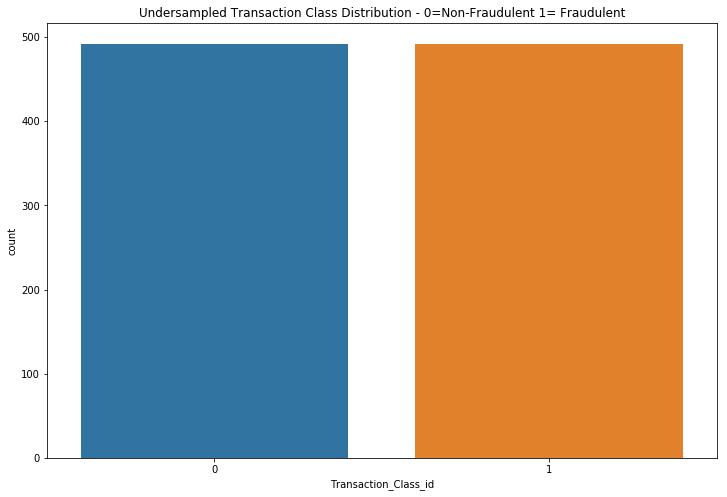

In [338]:
# Create countplot of Undersampled Transaction Class - Non-Fraudulent vs Fraudulent
plt.figure(figsize=(12,8))
plt.title('Undersampled Transaction Class Distribution - 0=Non-Fraudulent 1= Fraudulent')
sns.countplot(x= 'Transaction_Class_id', data = df_undersampled)
plt.savefig('Undersampled Transaction Class Distribution Countplot.pdf')

## Oversampling Fraudulent_Transaction - The Minority Class

Oversampling is a resampling method for handling imbalanced data whereby the number of observations in the minority (Fraudulent) class is randomly replicated to match the number of observations in the majority (Non-Fraudulent) class. Hence, we have a balanced dataset.

In this project, oversampling would be performed by randomly replicating observations in fraudulent transaction class to match the number of observations in the non-fraudulent class.

In [96]:
# Oversample Fraudulent_Transaction - the minority class

Fraudulent_Transaction_oversampled = resample(Fraudulent_Transactions,
                                  replace=True,     #sample with replacement
                                  n_samples=284315,   # to match Non_Fraudulent_Transaction - the majority class
                                  random_state=42)  # reproducible results

In [97]:
# Combine Non_Fraudulent_Transactions Class (Majority Class) with the Oversampled Fraudulent_Transaction Class(Minority Class)
df_oversampled = pd.concat([Non_Fraudulent_Transactions, Fraudulent_Transaction_oversampled])

In [98]:
# Display the new Transaction_Class_id Frequency counts
df_oversampled.Transaction_Class_id.value_counts()

1    284315
0    284315
Name: Transaction_Class_id, dtype: int64

The above result shows we now have equal or balanced observations for both Fraudulent_Transactions and Non_Fraudulent_Transactions.

In [99]:
# Display the first ten lines of the oversampled dataset
df_oversampled.head(10)

,Time_in_Seconds,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Transaction_Amount,Normalized_Transaction_Amount,Transaction_Class_id
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,-0.073403,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,-0.338556,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,-0.333279,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,-0.190107,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.019392,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,-0.338516,0


In [100]:
# Separate the oversampled dataset into Predictors(Features or Inputs) and Target (Response)datasets
# Both Time_in_Seconds and Transaction_Amount are dropped from the Features
X_oversampled = df_oversampled.drop(['Time_in_Seconds', 'Transaction_Amount','Transaction_Class_id'], axis = 1 )
y_oversampled = df_oversampled['Transaction_Class_id']

In [101]:
# Display the first five lines of the dataset
X_oversampled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Normalized_Transaction_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


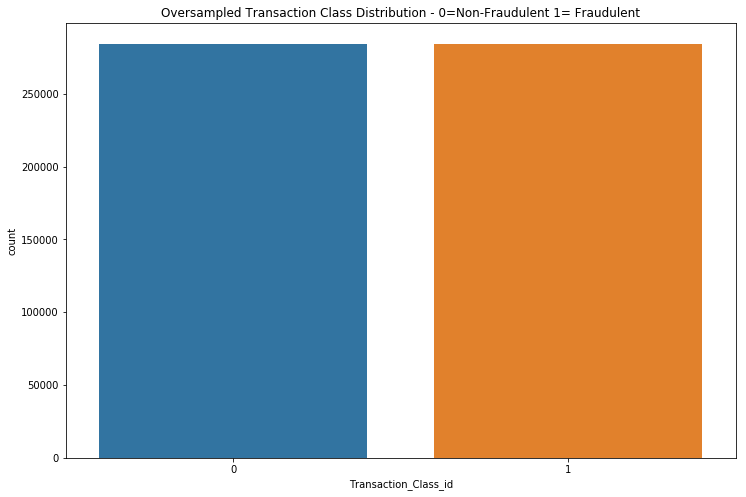

In [337]:
# Create countplot of Oversampled Transaction Class - Non-Fraudulent vs Fraudulent
plt.figure(figsize=(12,8))
plt.title('Oversampled Transaction Class Distribution - 0=Non-Fraudulent 1= Fraudulent')
sns.countplot(x= 'Transaction_Class_id', data = df_oversampled)
plt.savefig('Oversampled Transaction Class Distribution Countplot.pdf')

## Model Performance Metrics

Performance Metrics like accuracy score would be misleading to use when dealing with an imbalanced dataset like one for this project. Hence, performance metrics including precision, recall f1-score, compute area under the receiver operating characteristics (roc auc), precision-recall auc are more meaningful and suitable for imbalanced dataset. Performance Metrics for this project are focused on the evaluation of Fraudulent Transactions detections.

Classification report would be leveraged to produce precision, recall and f1 score for the models developed in this project. For this project, precision provides what proportion of Fraudulent Transactions is correctly identified by the model. While Recall provides information about the model's performance with respect to how many fraudulent transactions were found.



## ROC and Precision-Recall Curves

ROC Curve is the Receiver Operating Characteristic Curve. This is a plot with False positive rate on the x-axis and the True positive rate on the y-axis. ROC-AUC is more appropriate for balanced dataset.

ROC AUC Score is the value of Compute of Area Under the Receiver Operating Characteristic Curve from prediction scores. The higher this value, the better the model's performance for binary classification task.

Precision-Recall Curve is a plot of Precision against Recall. And it is appropriate for imbalanced dataset. 

## Logistic Regression Baseline Model

Logistic Regression model would be developed for this credit card fraud detection classification task.

In [102]:
# Import LogisticRegression and create its instance
from sklearn.linear_model import LogisticRegression
LogReg_base_model = LogisticRegression(C=0.1,random_state=42)


In [103]:
#  Fit the logistic regression model on the training dataset
LogReg_base_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Logistic Regression Model Predictions

In [104]:
# Leverage Predict method to test the logistic regression model
# Predict values for the testing data
LogReg_y_pred = LogReg_base_model.predict(X_test)
 
# logistics Regression Model Prediction Probabilities
LogReg_probs = LogReg_base_model.predict_proba(X_test)

# Retain probabilities for the positive result only
LogReg_probs = LogReg_probs[:,1]


In [105]:
LogReg_probs

array([9.99997338e-01, 3.26322869e-04, 2.63115854e-04, ...,
       1.47149055e-03, 9.55842407e-04, 1.21370248e-03])

## Evaluation - Classification report and Confusion Matrix

In [106]:
# Import classification_report and Generate a classification report 
# for the logistic regression model
from sklearn.metrics import classification_report
print(classification_report(y_test, LogReg_y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.62      0.73       136

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



From the above Classification report, 0 class (Non-Fraudulent Transaction Class) is predicted with 
both 100% precision and recall whereas the 1 class (Fraudulent Transaction Class) has 88% precision. 
That means, this model is 88% correct when it predicts or classifies a transaction as Fraudulent. Furthermore, this model has a recall of 62%, that means the percentage or proportion of Fraudulent Transactions that are correctly identified as Fraudulent. That means, the probability of Fraudulent Transaction detection by this model is 62%. While f1-score of this model for Fraudulent Transaction is 0.73 or 73%.

In [107]:
# Import confusion matrix and generate confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,LogReg_y_pred))

[[85295    12]
 [   51    85]]


The above confusion matrix depicts how this model is confused when it makes predictions. It provides a better understanding of the errors and the types of error (Type I or Type II error) being made by this classifier.  This project would focus more on the classification report for the models comparison.

## Logisitic Regression Model Precision-Recall AUC Score

In [108]:
# Logisitic Regression Model Precision-Recall AUC Score
# import auc & precision-recall curve from sklearn 

from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve   # Precision_Recall Curve for Imbalanced dataset

# Compute Logistic Regression Model precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test,LogReg_probs)

# Compute Logistic Regression Model Precision-Recall AUC
# for Imbalanced dataset
LogReg_auc = auc(recall,precision)

In [112]:
LogReg_auc 

0.7902782576587224

This classification model produced Area under the Precison-Recall Curve of 0.79. This score provides a measure of how well this model can differentiate between Transaction Classes - Fraudulent or Non-Fraudulent.

## Precision-Recall Curve for Logistic Regression Model

A Precision-Recall curve is essentially a plot of the precision on the y-axis and the recall on the x-axis for different thresholds.
It is appropriate to use this curve since we are dealing with a highly imbalanced class between non-fraudulent majority class and fraudulent minority class.

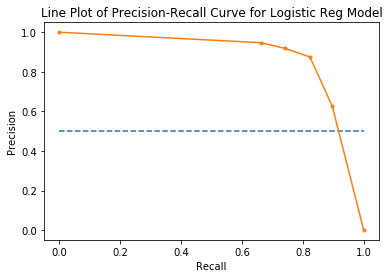

<Figure size 432x288 with 0 Axes>

In [279]:
## Plot Logistic Regression Model Precision-Recall Curve
from matplotlib import pyplot
plt.title('Line Plot of Precision-Recall Curve for Logistic Reg Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
# plot no skill - a straight line at 0.5
pyplot.plot([0,1], [0.5,0.5], linestyle='--')

# Plot the Precision-Recall Curve for logistic Regression Model
pyplot.plot(recall,precision, marker='.')

# Display Precision-Recall Curve
pyplot.show()

plt.savefig('LogReg Model Precision-Recall Curve.pdf')


The above Precision-Recall Curve is a visual representation of Logistic Regression Classifier performance. It shows the precision/recall for each threshold in comparison to a no skill model. 

## Logistic Regression Model Features importance

It worth noting that Logistic Regression Classifier has no features importance attribute. Hence, there is no need to generate features importance for Logistic Regression Classifier.  

## Logistic Regression with Cross-Validation

For Logistic Regression Model, more than one split is done in cross-validation. Cross Validation would reveal consistency in performance of this algorithm and data or reveal inconsistency for further investigation.

In [113]:
import warnings
warnings.filterwarnings('ignore')

In [114]:
# import cross validation score
from sklearn.model_selection import cross_val_score

In [115]:
# Compute Evaluation Metrics for Logistic Regression model on the dataset by splitting data into 5 fold
# calculating the Evaluation Metrics 5 consecutive times with different splits each time
# Logistic Regression model with cross validation Evaluation Metrics - accuracy,precision,recall,f1-score and 
# Precision-Recall AUC
LogReg_cross_val_accuracy = cross_val_score(LogReg_base_model, X, y, cv=5, scoring='accuracy')
LogReg_cross_val_precision = cross_val_score(LogReg_base_model, X, y, cv=5, scoring='precision')
LogReg_cross_val_recall = cross_val_score(LogReg_base_model, X, y, cv=5, scoring='recall')
LogReg_cross_val_f1 = cross_val_score(LogReg_base_model, X, y, cv=5, scoring='f1')
LogReg_cross_val_roc_auc = cross_val_score(LogReg_base_model, X, y, cv=5, scoring='roc_auc')


In [116]:
# Display the 5 Accuracy Results for Logistic Regression Model with Cross Validation
LogReg_cross_val_accuracy

array([0.99915733, 0.99926267, 0.9989642 , 0.99942066, 0.99910465])

In [117]:
# Display the 5 Precision Results for Logistic Regression Model with Cross Validation
LogReg_cross_val_precision

array([0.71428571, 0.96721311, 0.93333333, 0.98507463, 0.97959184])

In [118]:
# Display the 5 Recall Results for Logistic Regression Model with Cross Validation
LogReg_cross_val_recall

array([0.85858586, 0.5959596 , 0.42857143, 0.67346939, 0.48979592])

In [119]:
# Display the 5 f1-Score Results for Logistic Regression Model with Cross Validation
LogReg_cross_val_f1

array([0.77981651, 0.7375    , 0.58741259, 0.8       , 0.65306122])

In [120]:
# Display the 5 Roc_Auc Results for Logistic Regression Model with Cross Validation
LogReg_cross_val_roc_auc

array([0.99496468, 0.97256191, 0.967426  , 0.96153393, 0.97603729])

## Logistic Regression Model with Cross-Validation Performance Metrics

In [267]:
# Compute Logistic Regression Model with Cross Validation Performance Metrics Mean and Standard Deviation
# Display the Evaluation Metrics for Logistic Regression Classifier with Cross-Validation
print ("Average Evaluation Metrics of Logistic Regression Classifier with 5-fold Cross-Validation:")
print('Accuracy: %0.3f (+/- %0.3f)' % (LogReg_cross_val_accuracy.mean(), LogReg_cross_val_accuracy.std()))
print('Precision: %0.3f (+/- %0.3f)' % (LogReg_cross_val_precision.mean(), LogReg_cross_val_precision.std()))
print('Recall: %0.3f (+/- %0.3f)' % (LogReg_cross_val_recall.mean(), LogReg_cross_val_recall.std()))
print('F1-Score: %0.3f (+/- %0.3f)' % (LogReg_cross_val_f1.mean(), LogReg_cross_val_f1.std()))
print('roc-auc: %0.3f (+/- %0.3f)' % (LogReg_cross_val_roc_auc.mean(), LogReg_cross_val_roc_auc.std()))


Average Evaluation Metrics of Logistic Regression Classifier with 5-fold Cross-Validation:
Accuracy: 0.999 (+/- 0.000)
Precision: 0.916 (+/- 0.102)
Recall: 0.609 (+/- 0.151)
F1-Score: 0.712 (+/- 0.080)
roc-auc: 0.975 (+/- 0.011)


The Logistic Regression model with cross-validation produced precision score of 0.916, recall score of 0.609, F1-Score of 0.712 and ROC-AUC of 0.975 for this classification task.

## Logistic Regression Model with Cross-Validation and Undersampling

Logistic Regression Model would leverage cross-validation and undersampling techniques. Undersampling method is leveraged to handle the issue of imbalanced dataset. Cross-Validation is utilized to get an accurate performance of this model on the dataset through 5-fold splits.

In [122]:
# import cross validation score
from sklearn.model_selection import cross_val_score

In [123]:
# Compute Evaluation Metrics for Logistic Regression model with Cross Validation and undersampling on the dataset by splitting data into 5 folds 
# Logistic Regression model with cross validation Evaluation Metrics - accuracy,precision,recall,f1-score,roc-auc

LogReg_undersampled_accuracy = cross_val_score(LogReg_base_model, X_undersampled, y_undersampled, cv=5, scoring='accuracy')
LogReg_undersampled_precision = cross_val_score(LogReg_base_model, X_undersampled, y_undersampled, cv=5, scoring='precision')
LogReg_undersampled_recall = cross_val_score(LogReg_base_model, X_undersampled, y_undersampled, cv=5, scoring='recall')
LogReg_undersampled_f1 = cross_val_score(LogReg_base_model, X_undersampled, y_undersampled, cv=5, scoring='f1')
LogReg_undersampled_roc_auc = cross_val_score(LogReg_base_model, X_undersampled, y_undersampled, cv=5, scoring='roc_auc')

In [125]:
# Display the 5 Accuracy Results for Logistic Regression Model with Cross Validation and Undersampling
LogReg_undersampled_accuracy

array([0.96969697, 0.93434343, 0.92857143, 0.94387755, 0.91836735])

In [126]:
# Display the 5 Precision Results for Logistic Regression Model with Cross Validation and Undersampling
LogReg_undersampled_precision

array([0.97938144, 0.95744681, 0.98837209, 0.94845361, 0.96590909])

In [127]:
# Display the 5 Recall Results for Logistic Regression Model with Cross Validation and Undersampling
LogReg_undersampled_recall

array([0.95959596, 0.90909091, 0.86734694, 0.93877551, 0.86734694])

In [128]:
# Display the 5 f1-Score Results for Logistic Regression Model with Cross Validation and Undersampling
LogReg_undersampled_f1

array([0.96938776, 0.93264249, 0.92391304, 0.94358974, 0.91397849])

In [129]:
# Display the 5 Roc_Auc Results for Logistic Regression Model with Cross Validation and Undersampling
LogReg_undersampled_roc_auc

array([0.99469442, 0.97092133, 0.97147022, 0.97823823, 0.97428155])

## Logistic Regression Model with Cross-Validation and Undersampling Performance Metrics

In [130]:
# Compute Logistic Regression Model with Cross Validation and undersampling Performance Metrics Mean and Standard Deviation 
# Display the Evaluation Metrics for Logistic Regression Classifier with Cross-Validation and undersampling
print ("Average Evaluation Metrics of Logistic Regression Classifier with Cross-Validation and undersampling:")
print('Accuracy: %0.3f (+/- %0.3f)' % (LogReg_undersampled_accuracy.mean(), LogReg_undersampled_accuracy.std()))
print('Precision: %0.3f (+/- %0.3f)' % (LogReg_undersampled_precision.mean(), LogReg_undersampled_precision.std()))
print('Recall: %0.3f (+/- %0.3f)' % (LogReg_undersampled_recall.mean(), LogReg_undersampled_recall.std()))
print('F1-Score: %0.3f (+/- %0.3f)' % (LogReg_undersampled_f1.mean(), LogReg_undersampled_f1.std()))
print('roc-auc: %0.3f (+/- %0.3f)' % (LogReg_undersampled_roc_auc.mean(), LogReg_undersampled_roc_auc.std()))

Average Evaluation Metrics of Logistic Regression Classifier with Cross-Validation and undersampling:
Accuracy: 0.939 (+/- 0.017)
Precision: 0.968 (+/- 0.014)
Recall: 0.908 (+/- 0.037)
F1-Score: 0.937 (+/- 0.019)
roc-auc: 0.978 (+/- 0.009)


This model with cross-validation and undersampling produced an average accuracy score of 0.939, precision score of 0.968, recall score of 0.908, F1-Score of 0.937 and ROC-AUC of 0.978. 

## Logistic Regression Model with Cross-Validation and Oversampling

Logistic Regression Model would leverage cross-validation and oversampling techniques. Oversampling method is leveraged to handle the issue of imbalanced dataset. Cross-Validation is utilized to get an accurate performance of this model on the dataset through 5-fold splits.

In [131]:
# import cross validation score
from sklearn.model_selection import cross_val_score

In [132]:
# Compute Evaluation Metrics for Logistic Regression model with Cross Validation and Oversampling on the dataset by splitting data into 5 folds 
# Logistic Regression model with cross validation Evaluation Metrics - accuracy,precision,recall,f1-score,roc-auc

LogReg_oversampled_accuracy = cross_val_score(LogReg_base_model, X_oversampled, y_oversampled, cv=5, scoring='accuracy')
LogReg_oversampled_precision = cross_val_score(LogReg_base_model, X_oversampled, y_oversampled, cv=5, scoring='precision')
LogReg_oversampled_recall = cross_val_score(LogReg_base_model, X_oversampled, y_oversampled, cv=5, scoring='recall')
LogReg_oversampled_f1 = cross_val_score(LogReg_base_model, X_oversampled, y_oversampled, cv=5, scoring='f1')
LogReg_oversampled_roc_auc = cross_val_score(LogReg_base_model, X_oversampled, y_oversampled, cv=5, scoring='roc_auc')

In [133]:
# Display the 5 Accuracy Results for Logistic Regression Model with Cross Validation and Oversampling
LogReg_oversampled_accuracy

array([0.94785713, 0.95218332, 0.94550938, 0.94230871, 0.94499938])

In [134]:
# Display the 5 Precision Results for Logistic Regression Model with Cross Validation and Oversampling
LogReg_oversampled_precision

array([0.97315274, 0.98213047, 0.96998256, 0.95804043, 0.96689793])

In [135]:
# Display the 5 Recall Results for Logistic Regression Model with Cross Validation and Oversampling
LogReg_oversampled_recall

array([0.92112622, 0.92112622, 0.91947312, 0.92513585, 0.92154828])

In [136]:
# Display the 5 f1-Score Results for Logistic Regression Model with Cross Validation and Oversampling
LogReg_oversampled_f1

array([0.94642502, 0.95065067, 0.94405272, 0.94130067, 0.94367859])

In [137]:
# Display the 5 Roc_Auc Results for Logistic Regression Model with Cross Validation and Oversampling
LogReg_oversampled_roc_auc

array([0.98363756, 0.98679999, 0.98577845, 0.98315718, 0.98498701])

## Logistic Regression Model with Cross-Validation and Oversampling Performance Metrics

In [138]:
# Compute Logistic Regression Model with Cross Validation and Oversampling Performance Metrics Mean and Standard Deviation 
# Display the Evaluation Metrics for Logistic Regression Classifier with Cross-Validation and Oversampling
print ("Average Evaluation Metrics of Logistic Regression Classifier with Cross-Validation and oversampling:")
print('Accuracy: %0.3f (+/- %0.3f)' % (LogReg_oversampled_accuracy.mean(), LogReg_oversampled_accuracy.std()))
print('Precision: %0.3f (+/- %0.3f)' % (LogReg_oversampled_precision.mean(), LogReg_oversampled_precision.std()))
print('Recall: %0.3f (+/- %0.3f)' % (LogReg_oversampled_recall.mean(), LogReg_oversampled_recall.std()))
print('F1-Score: %0.3f (+/- %0.3f)' % (LogReg_oversampled_f1.mean(), LogReg_oversampled_f1.std()))
print('roc-auc: %0.3f (+/- %0.3f)' % (LogReg_oversampled_roc_auc.mean(), LogReg_oversampled_roc_auc.std()))

Average Evaluation Metrics of Logistic Regression Classifier with Cross-Validation and oversampling:
Accuracy: 0.947 (+/- 0.003)
Precision: 0.970 (+/- 0.008)
Recall: 0.922 (+/- 0.002)
F1-Score: 0.945 (+/- 0.003)
roc-auc: 0.985 (+/- 0.001)


This model with cross-validation and oversampling produced an average accuracy score of 0.947, precision score of 0.970, recall score of 0.922, F1-Score of 0.945 and ROC-AUC of 0.985.

## Decision Tree Baseline Model

In [139]:
# Import Decision Tree Classifier and create its instance
from sklearn.tree import DecisionTreeClassifier
dtree_base_model = DecisionTreeClassifier(max_depth=6, criterion ='entropy',min_samples_leaf=3,random_state=42)


In [140]:
#  Fit the decision tree model on the training dataset
dtree_base_model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

## Decision Tree Model Predictions

In [141]:
# Leverage Predict method to test the decision tree model
# Predict values for the testing data
dtree_y_pred = dtree_base_model.predict(X_test)

## Decision Tree Model Prediction Probabilities

In [142]:
# Decision Tree Model Prediction Probabilities
dtree_probs = dtree_base_model.predict_proba(X_test)

# Retain probabilities for the positive result only
dtree_probs = dtree_probs[:,1]

## Decision Tree Model Evaluation - Classification report and Confusion Matrix

In [143]:
# Import classification_report and Generate a classification report 
# for the decision tree model
from sklearn.metrics import classification_report
print(classification_report(y_test, dtree_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.84      0.82      0.83       136

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.92      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443



From the above Classification report, 0 class (Non-Fraudulent Transaction Class) is predicted with both 100% precision and recall whereas the 1 class (Fraudulent Transaction Class) has 84% precision. That means, this model is 84% correct when it predicts or classifies a transaction as Fraudulent. Furthermore, this model has a recall of 82%, that means the percentage or proportion of Fraudulent Transactions that are correctly identified as Fraudulent. That means, the probability of Fraudulent Transaction detection by this model is 82%. While f1-score of this model for Fraudulent Transaction is 0.83 or 83%.

In [144]:
# Import confusion matrix and generate confusion matrix 
# for baseline decision tree model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,dtree_y_pred))

[[85286    21]
 [   25   111]]


The above confusion matrix depicts how this model is confused when it makes predictions. It provides a better understanding of the errors and the types of error (Type I or Type II error) being made by this classifier.  However, this project would focus more on the classification report for the models comparison.

## Decision Tree Model Precision-Recall AUC Curve

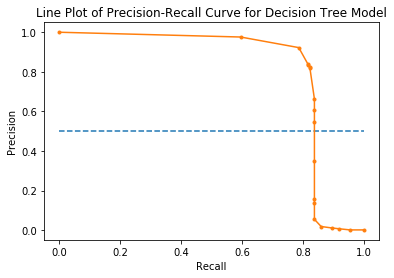

<Figure size 432x288 with 0 Axes>

In [280]:
# Decision Tree Model Precision-Recall AUC Score
# import auc & precision-recall curve from sklearn 

from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve   # Precision_Recall Curve for Imbalanced dataset

# Compute Decision Tree Model Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test,dtree_probs)

# Compute Decision Tree Model Precision-Recall AUC
# for Imbalanced dataset
dtree_auc = auc(recall,precision)


## Plot Decision Tree Model Precision-Recall Curve
from matplotlib import pyplot
plt.title('Line Plot of Precision-Recall Curve for Decision Tree Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
# plot no skill - a straight line at 0.5
pyplot.plot([0,1], [0.5,0.5], linestyle='--')

# Plot the Precision-Recall Curve for Decision Tree Model
pyplot.plot(recall,precision, marker='.')

# Display Precision-Recall Curve
pyplot.show()

plt.savefig('Decision Tree Model Precision-Recall Curve.pdf')

The above Precision-Recall Curve is a visual representation of Decision Tree Model performance. It shows the precision/recall for each threshold in comparison to a no skill model. 

## Decision Tree Model Precision-Recall AUC Score

In [281]:
print(dtree_auc)

0.814578143917488


Decision Tree Model produced a precision-recall auc score of 0.81.

## Decision Tree Model Features importance

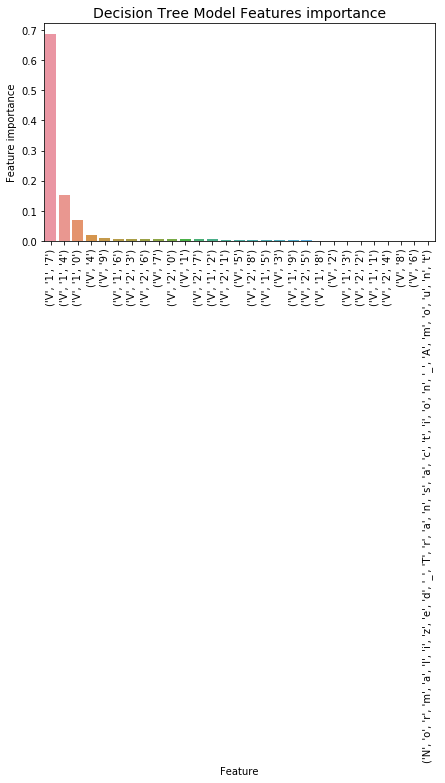

<Figure size 432x288 with 0 Axes>

In [272]:
# Visualize Decision Tree Model Features Importance
dtree_feature_imp = pd.DataFrame({'Feature': X, 'Feature importance': dtree_base_model.feature_importances_})
dtree_feature_imp = dtree_feature_imp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Decision Tree Model Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=dtree_feature_imp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   
plt.savefig('Decision Tree Model Features Importance.pdf')

The above result identifies features V17,V14,V10,V4 and V9 as the top five features that facilitate the classification of a transaction as either a non-fraudulent or fraudulent transaction by Decision Tree Model.

## Decision Tree Classifier with Cross Validation

For Decision Tree Model, more than one split is done in cross-validation. Cross Validation would reveal consistency in performance of this algorithm and data or reveal inconsistency for further investigation.

In [147]:
# import cross validation score
from sklearn.model_selection import cross_val_score

In [148]:
# Compute Prediction scores for Decision Tree Classifier model on the dataset by splitting data into 5 folds 
# calculating the score 5 consecutive times with different splits each time
# Decision Tree Classifier model with cross validation Evaluation Metrics - accuracy,precision,recall,f1-score,roc-auc
dtree_cross_val_accuracy = cross_val_score(dtree_base_model, X, y, cv=5, scoring='accuracy')
dtree_cross_val_precision = cross_val_score(dtree_base_model, X, y, cv=5, scoring='precision')
dtree_cross_val_recall = cross_val_score(dtree_base_model, X, y, cv=5, scoring='recall')
dtree_cross_val_f1 = cross_val_score(dtree_base_model, X, y, cv=5, scoring='f1')
dtree_cross_val_roc_auc = cross_val_score(dtree_base_model, X, y, cv=5, scoring='roc_auc')

In [149]:
# Display the 5 Accuracy Results for Decision Tree Model with Cross Validation
dtree_cross_val_accuracy

array([0.99899933, 0.99947333, 0.99898176, 0.99942066, 0.99928021])

In [150]:
# Display the 5 Precision Results for Decision Tree Model with Cross Validation
dtree_cross_val_precision

array([0.66666667, 0.96      , 0.75641026, 0.91139241, 0.90140845])

In [151]:
# Display the 5 Recall Results for Decision Tree Model with Cross Validation
dtree_cross_val_recall

array([0.84848485, 0.72727273, 0.60204082, 0.73469388, 0.65306122])

In [152]:
# Display the 5 f1-Score Results for Decision Tree Model with Cross Validation
dtree_cross_val_f1

array([0.74666667, 0.82758621, 0.67045455, 0.81355932, 0.75739645])

In [153]:
# Display the 5 Roc_Auc Results for Decision Tree Model with Cross Validation
dtree_cross_val_roc_auc

array([0.9251633 , 0.92830535, 0.89751531, 0.93925635, 0.87117964])

## Decision Tree Model with Cross-Validation Performance Metrics

In [154]:
# Compute Decision Tree Model with Cross Validation Performance Metrics Mean and Standard Deviation 
# Display the Evaluation Metrics for Decision Tree Classifier with Cross-Validation
print ("Average Evaluation Metrics of Decision Tree Classifier with 5-fold Cross-Validation:")
print('Accuracy: %0.3f (+/- %0.3f)' % (dtree_cross_val_accuracy.mean(), dtree_cross_val_accuracy.std()))
print('Precision: %0.3f (+/- %0.3f)' % (dtree_cross_val_precision.mean(), dtree_cross_val_precision.std()))
print('Recall: %0.3f (+/- %0.3f)' % (dtree_cross_val_recall.mean(), dtree_cross_val_recall.std()))
print('F1-Score: %0.3f (+/- %0.3f)' % (dtree_cross_val_f1.mean(), dtree_cross_val_f1.std()))
print('roc-auc: %0.3f (+/- %0.3f)' % (dtree_cross_val_roc_auc.mean(), dtree_cross_val_roc_auc.std()))

Average Evaluation Metrics of Decision Tree Classifier with 5-fold Cross-Validation:
Accuracy: 0.999 (+/- 0.000)
Precision: 0.839 (+/- 0.110)
Recall: 0.713 (+/- 0.084)
F1-Score: 0.763 (+/- 0.056)
roc-auc: 0.912 (+/- 0.025)


The decision tree model with cross-validation produced precision score of 0.839, recall score of 0.713, F1-Score of 0.763 and ROC-AUC of 0.912 for this classification task.

## Decision Tree Model with Cross-Validation and Undersampling

Decision Tree Model would leverage cross-validation and undersampling techniques. Undersampling method is leveraged to handle the issue of imbalanced dataset. Cross-Validation is utilized to get an accurate performance of this model on the dataset through 5-fold splits.

In [155]:
# import cross validation score
from sklearn.model_selection import cross_val_score

In [156]:
# Compute Evaluation Metrics for Decision Tree model with Cross Validation and undersampling on the dataset by splitting data into 5 folds 
# Decision Tree model with cross validation Evaluation Metrics - accuracy,precision,recall,f1-score,roc-auc
dtree_undersampled_accuracy = cross_val_score(dtree_base_model, X_undersampled, y_undersampled, cv=5, scoring='accuracy')
dtree_undersampled_precision = cross_val_score(dtree_base_model, X_undersampled, y_undersampled, cv=5, scoring='precision')
dtree_undersampled_recall = cross_val_score(dtree_base_model, X_undersampled, y_undersampled, cv=5, scoring='recall')
dtree_undersampled_f1 = cross_val_score(dtree_base_model, X_undersampled, y_undersampled, cv=5, scoring='f1')
dtree_undersampled_roc_auc = cross_val_score(dtree_base_model, X_undersampled, y_undersampled, cv=5, scoring='roc_auc')

In [157]:
# Display the 5 Accuracy Results for Decision Tree Model with Cross Validation and Undersampling
dtree_undersampled_accuracy

array([0.93939394, 0.91414141, 0.88265306, 0.89795918, 0.91326531])

In [158]:
# Display the 5 Precision Results for Decision Tree Model with Cross Validation and Undersampling
dtree_undersampled_precision

array([0.90654206, 0.92708333, 0.90322581, 0.88235294, 0.95505618])

In [159]:
# Display the 5 Recall Results for Decision Tree Model with Cross Validation and Undersampling
dtree_undersampled_recall

array([0.97979798, 0.8989899 , 0.85714286, 0.91836735, 0.86734694])

In [160]:
# Display the 5 f1-Score Results for Decision Tree Model with Cross Validation and Undersampling 
dtree_undersampled_f1

array([0.94174757, 0.91282051, 0.87958115, 0.9       , 0.90909091])

In [161]:
# Display the 5 Roc_Auc Results for Decision Tree Model with Cross Validation and Undersampling
dtree_undersampled_roc_auc

array([0.97234976, 0.94867871, 0.88645356, 0.91706581, 0.92966472])

## Decision Tree Model with Cross-Validation and Undersampling Performance Metrics

In [162]:
# Compute Decision Tree Model with Cross Validation and undersampling Performance Metrics Mean and Standard Deviation 
# Display the Evaluation Metrics for Decision Tree Classifier with Cross-Validation and undersampling
print ("Average Evaluation Metrics of Decision Tree Classifier with Cross-Validation and Undersampling:")
print('Accuracy: %0.3f (+/- %0.3f)' % (dtree_undersampled_accuracy.mean(), dtree_undersampled_accuracy.std()))
print('Precision: %0.3f (+/- %0.3f)' % (dtree_undersampled_precision.mean(), dtree_undersampled_precision.std()))
print('Recall: %0.3f (+/- %0.3f)' % (dtree_undersampled_recall.mean(), dtree_undersampled_recall.std()))
print('F1-Score: %0.3f (+/- %0.3f)' % (dtree_undersampled_f1.mean(), dtree_undersampled_f1.std()))
print('roc-auc: %0.3f (+/- %0.3f)' % (dtree_undersampled_roc_auc.mean(), dtree_undersampled_roc_auc.std()))


Average Evaluation Metrics of Decision Tree Classifier with Cross-Validation and Undersampling:
Accuracy: 0.909 (+/- 0.019)
Precision: 0.915 (+/- 0.025)
Recall: 0.904 (+/- 0.044)
F1-Score: 0.909 (+/- 0.020)
roc-auc: 0.931 (+/- 0.029)


This model with cross-validation and undersampling produced an average accuracy score of 0.909, precision score of 0.915, recall score of 0.904, F1-Score of 0.909 and ROC-AUC of 0.931. 

## Decision Tree Model with Cross-Validation and Oversampling

Decision Tree Model would leverage cross-validation and oversampling techniques. Oversampling method is leveraged to handle the issue of imbalanced dataset. Cross-Validation is utilized to get an accurate performance of this model on the dataset through 5-fold splits.

In [163]:
# import cross validation score
from sklearn.model_selection import cross_val_score

In [164]:
# Compute Evaluation Metrics for Decision Tree model with Cross Validation and Oversampling on the dataset by splitting data into 5 folds 
# Decision Tree model with cross validation Evaluation Metrics - accuracy,precision,recall,f1-score,roc-auc

dtree_oversampled_accuracy = cross_val_score(dtree_base_model, X_oversampled, y_oversampled, cv=5, scoring='accuracy')
dtree_oversampled_precision = cross_val_score(dtree_base_model, X_oversampled, y_oversampled, cv=5, scoring='precision')
dtree_oversampled_recall = cross_val_score(dtree_base_model, X_oversampled, y_oversampled, cv=5, scoring='recall')
dtree_oversampled_f1 = cross_val_score(dtree_base_model, X_oversampled, y_oversampled, cv=5, scoring='f1')
dtree_oversampled_roc_auc = cross_val_score(dtree_base_model, X_oversampled, y_oversampled, cv=5, scoring='roc_auc')


In [165]:
# Display the 5 Accuracy Results for Decision Tree Model with Cross Validation and Oversampling
dtree_oversampled_accuracy

array([0.94412008, 0.95797795, 0.96304275, 0.96528498, 0.96794928])

In [166]:
# Display the 5 Precision Results for Decision Tree Model with Cross Validation and Oversampling
dtree_oversampled_precision

array([0.91945985, 0.96372734, 0.96815547, 0.964012  , 0.9466096 ])

In [167]:
# Display the 5 Recall Results for Decision Tree Model with Cross Validation and Oversampling
dtree_oversampled_recall

array([0.97351529, 0.95177884, 0.95758226, 0.9666567 , 0.99184004])

In [168]:
# Display the 5 f1-Score Results for Decision Tree Model with Cross Validation and Oversampling
dtree_oversampled_f1

array([0.94571577, 0.95771582, 0.96283984, 0.96533254, 0.96869713])

In [169]:
# Display the 5 Roc_Auc Results for Decision Tree Model with Cross Validation and Oversampling
dtree_oversampled_roc_auc

array([0.99152477, 0.99524745, 0.99424665, 0.99576163, 0.99671347])

## Decision Tree Model with Cross-Validation and Oversampling Performance Metrics

In [170]:
# Compute Decision Tree Model with Cross Validation and Oversampling Performance Metrics Mean and Standard Deviation 
# Display the Evaluation Metrics for Decision Tree Classifier with Cross-Validation and Oversampling
print ("Average Evaluation Metrics of Decision Tree Classifier with Cross-Validation and oversampling:")
print('Accuracy: %0.3f (+/- %0.3f)' % (dtree_oversampled_accuracy.mean(), dtree_oversampled_accuracy.std()))
print('Precision: %0.3f (+/- %0.3f)' % (dtree_oversampled_precision.mean(), dtree_oversampled_precision.std()))
print('Recall: %0.3f (+/- %0.3f)' % (dtree_oversampled_recall.mean(), dtree_oversampled_recall.std()))
print('F1-Score: %0.3f (+/- %0.3f)' % (dtree_oversampled_f1.mean(), dtree_oversampled_f1.std()))
print('roc-auc: %0.3f (+/- %0.3f)' % (dtree_oversampled_roc_auc.mean(), dtree_oversampled_roc_auc.std()))

Average Evaluation Metrics of Decision Tree Classifier with Cross-Validation and oversampling:
Accuracy: 0.960 (+/- 0.008)
Precision: 0.952 (+/- 0.018)
Recall: 0.968 (+/- 0.014)
F1-Score: 0.960 (+/- 0.008)
roc-auc: 0.995 (+/- 0.002)


This model with cross-validation and oversampling produced an average accuracy score of 0.960, precision score of 0.952, recall score of 0.968, F1-Score of 0.960 and ROC-AUC of 0.995. 

## Random Forest Baseline Model

In [171]:
# Import Random Forest Classifier and 
# create its instance with 100 no of trees
from sklearn.ensemble import RandomForestClassifier
rfc_base_model = RandomForestClassifier(n_estimators = 100,n_jobs=4,random_state=42)


In [172]:
#  Fit the random forest model on the training dataset
rfc_base_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

## Random Forest Model Predictions

In [173]:
# Leverage Predict method to test the random forest model
# Predict values for the testing data
rfc_y_pred = rfc_base_model.predict(X_test)

## Random Forest Model Prediction Probabilities

In [174]:
# Random Forest Model Prediction Probabilities
rfc_probs = rfc_base_model.predict_proba(X_test)

# Retain probabilities for the positive result only
rfc_probs = rfc_probs[:,1]

## Random Forest Model Evaluation - Classification report and Confusion Matrix

In [175]:
# Import classification_report and Generate a classification report 
# for the random forest model
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.82      0.88       136

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



From the above Classification report, 0 class (Non-Fraudulent Transaction Class) is predicted with both 100% precision and recall whereas the 1 class (Fraudulent Transaction Class) has 94% precision. That means, this model is 94% correct when it predicts or classifies a transaction as Fraudulent. Furthermore, this model has a recall of 82%, that means the percentage or proportion of Fraudulent Transactions that are correctly identified as Fraudulent. That means, the probability of Fraudulent Transaction detection by this model is 82%. While f1-score of this model for Fraudulent Transaction is 0.88 or 88%.

In [176]:
# Import confusion matrix and generate confusion matrix 
# for baseline random forest model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,rfc_y_pred))


[[85300     7]
 [   24   112]]


The above confusion matrix depicts how this model is confused when it makes predictions. It provides a better understanding of the errors and the types of error (Type I or Type II error) being made by this classifier.  This project would focus more on the classification report for the models comparison.

## Random Forest Model Precision-Recall Curve

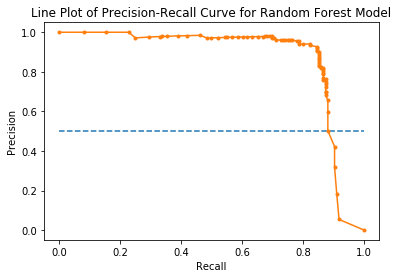

<Figure size 432x288 with 0 Axes>

In [283]:
# Random Forest Model Precision-Recall AUC Score
# import auc & precision-recall curve from sklearn 

from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve   # Precision_Recall Curve for Imbalanced dataset

# Compute Random Forest Model Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test,rfc_probs)

# Compute Random Forest Model Precision-Recall AUC
# for Imbalanced dataset
rfc_auc = auc(recall,precision)

## Plot Random Forest Model Precision-Recall Curve
from matplotlib import pyplot
plt.title('Line Plot of Precision-Recall Curve for Random Forest Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
# plot no skill - a straight line at 0.5
pyplot.plot([0,1], [0.5,0.5], linestyle='--')

# Plot the Precision-Recall Curve for Random Forest Model
pyplot.plot(recall,precision, marker='.')

# Display Precision-Recall Curve
pyplot.show()

plt.savefig('Random Forest Model Precision-Recall Curve.pdf')

The above Precision-Recall Curve is a visual representation of Random Forest Model performance. It shows the precision/recall for each threshold in comparison to a no skill model. 

## Random Forest Model Precision-Recall AUC Score

In [178]:
# Display Random Forest Model Precision-Recall AUC Score
print(rfc_auc)

0.872407816648124


Random Forest Model produced a precision-recall auc score of 0.87 for the imbalanced dataset.

## Random Forest Model Features importance

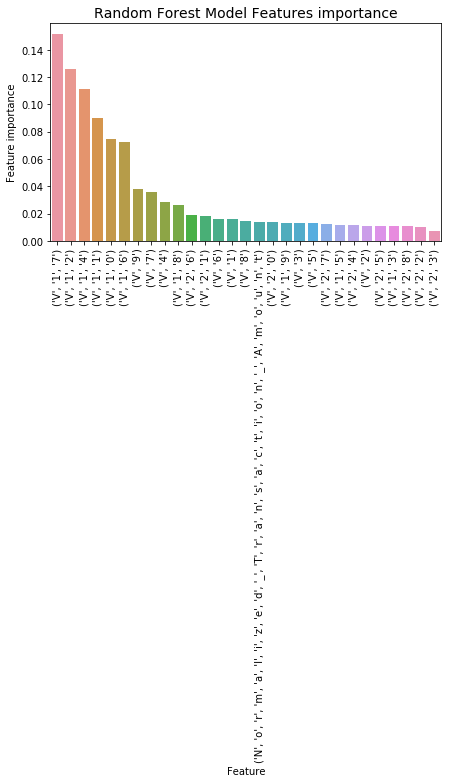

<Figure size 432x288 with 0 Axes>

In [270]:
# Visualize Random Forest Model features importance
rfc_feature_imp = pd.DataFrame({'Feature': X, 'Feature importance': rfc_base_model.feature_importances_})
rfc_feature_imp = rfc_feature_imp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Random Forest Model Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=rfc_feature_imp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   
plt.savefig('Random Forest Model Features Importance.pdf')

The above result identifies features V17,V12,V14,V10 and V11 as the top five features that facilitate the classification of a transaction as either a non-fraudulent or fraudulent transaction by Random Forest Model.


## Random Forest Classifier with Cross Validation

For Random Forest Model, more than one split is done in cross-validation. Cross Validation would reveal consistency in performance of this algorithm and data or reveal inconsistency for further investigation.

In [179]:
# import cross validation score
from sklearn.model_selection import cross_val_score

In [180]:
# Compute Prediction scores for Random Forest Classifier model on the dataset by splitting data into 5 folds 
# Calculating the score 10 consecutive times with different splits each time
# Random Forest Classifier model with cross validation Evaluation Metrics - accuracy,precision,recall,f1-score,roc-auc
rfc_cross_val_accuracy = cross_val_score(rfc_base_model, X, y, cv=5, scoring='accuracy')
rfc_cross_val_precision = cross_val_score(rfc_base_model, X, y, cv=5, scoring='precision')
rfc_cross_val_recall = cross_val_score(rfc_base_model, X, y, cv=5, scoring='recall')
rfc_cross_val_f1 = cross_val_score(rfc_base_model, X, y, cv=5, scoring='f1')
rfc_cross_val_roc_auc = cross_val_score(rfc_base_model, X, y, cv=5, scoring='roc_auc')

In [181]:
# Display the 5 Accuracy Results for Random Forest Model with Cross Validation
rfc_cross_val_accuracy

array([0.99910467, 0.99961378, 0.99915732, 0.99963133, 0.99945577])

In [182]:
# Display the 5 Precision Results for Random Forest Model with Cross Validation
rfc_cross_val_precision

array([0.69354839, 1.        , 0.80487805, 0.97530864, 0.98550725])

In [183]:
# Display the 5 Recall Results for Random Forest Model with Cross Validation
rfc_cross_val_recall

array([0.86868687, 0.77777778, 0.67346939, 0.80612245, 0.69387755])

In [184]:
# Display the 5 f1-Score Results for Random Forest Model with Cross Validation
rfc_cross_val_f1

array([0.77130045, 0.875     , 0.73333333, 0.88268156, 0.81437126])

In [185]:
# Display the 5 Roc_Auc Results for Random Forest Model with Cross Validation
rfc_cross_val_roc_auc

array([0.97266121, 0.93810242, 0.92303817, 0.96230108, 0.92651565])

## Random Forest Model with Cross-Validation Performance Metrics

In [186]:
# Compute Random Forest Model with Cross Validation Performance Metrics Mean and Standard Deviation
# Display the Evaluation Metrics for Random Forest Classifier with Cross-Validation
print ("Average Evaluation Metrics of Random Forest Classifier with 5-fold Cross-Validation:")
print('Accuracy: %0.3f (+/- %0.3f)' % (rfc_cross_val_accuracy.mean(), rfc_cross_val_accuracy.std()))
print('Precision: %0.3f (+/- %0.3f)' % (rfc_cross_val_precision.mean(), rfc_cross_val_precision.std()))
print('Recall: %0.3f (+/- %0.3f)' % (rfc_cross_val_recall.mean(), rfc_cross_val_recall.std()))
print('F1-Score: %0.3f (+/- %0.3f)' % (rfc_cross_val_f1.mean(), rfc_cross_val_f1.std()))
print('roc-auc: %0.3f (+/- %0.3f)' % (rfc_cross_val_roc_auc.mean(), rfc_cross_val_roc_auc.std()))


Average Evaluation Metrics of Random Forest Classifier with 5-fold Cross-Validation:
Accuracy: 0.999 (+/- 0.000)
Precision: 0.892 (+/- 0.122)
Recall: 0.764 (+/- 0.072)
F1-Score: 0.815 (+/- 0.058)
roc-auc: 0.945 (+/- 0.020)


The random forest model with cross-validation produced precision score of 0.892, recall score of 0.764, F1-Score of 0.815 and ROC-AUC of 0.945 for this classification task.

## Random Forest Model with Cross-Validation and Undersampling

Random Forest Model would leverage cross-validation and undersampling techniques. Undersampling method is leveraged to handle the issue of imbalanced dataset. Cross-Validation is utilized to get an accurate performance of this model on the dataset through 5-fold splits.

In [187]:
# import cross validation score
from sklearn.model_selection import cross_val_score

In [188]:
# Compute Evaluation Metrics for Random Forest model with Cross Validation and undersampling on the dataset by splitting data into 5 folds 
# Random Forest model with cross validation Evaluation Metrics - accuracy,precision,recall,f1-score,roc-auc
rfc_undersampled_accuracy = cross_val_score(rfc_base_model, X_undersampled, y_undersampled, cv=5, scoring='accuracy')
rfc_undersampled_precision = cross_val_score(rfc_base_model, X_undersampled, y_undersampled, cv=5, scoring='precision')
rfc_undersampled_recall = cross_val_score(rfc_base_model, X_undersampled, y_undersampled, cv=5, scoring='recall')
rfc_undersampled_f1 = cross_val_score(rfc_base_model, X_undersampled, y_undersampled, cv=5, scoring='f1')
rfc_undersampled_roc_auc = cross_val_score(rfc_base_model, X_undersampled, y_undersampled, cv=5, scoring='roc_auc')

In [189]:
# Display the 5 Accuracy Results for Random Forest Model with Cross Validation and Undersampling
rfc_undersampled_accuracy

array([0.96464646, 0.92424242, 0.92346939, 0.95918367, 0.91836735])

In [190]:
# Display the 5 Precision Results for Random Forest Model with Cross Validation and Undersampling
rfc_undersampled_precision

array([0.96938776, 0.96666667, 0.97701149, 0.9787234 , 0.97674419])

In [191]:
# Display the 5 Recall Results for Random Forest Model with Cross Validation and Undersampling
rfc_undersampled_recall

array([0.95959596, 0.87878788, 0.86734694, 0.93877551, 0.85714286])

In [192]:
# Display the 5 Roc_Auc Results for Random Forest Model with Cross Validation and Undersampling
rfc_undersampled_roc_auc

array([0.99433731, 0.96995205, 0.96090171, 0.99198251, 0.97324032])

## Random Forest Model with Cross-Validation and Undersampling Performance Metrics

In [193]:
# Compute Random Forest Model with Cross Validation and undersampling Performance Metrics Mean and Standard Deviation 
# Display the Evaluation Metrics for Random Forest Classifier with Cross-Validation and undersampling
print ("Average Evaluation Metrics of Random Forest Classifier with Cross-Validation and Undersampling:")
print('Accuracy: %0.3f (+/- %0.3f)' % (rfc_undersampled_accuracy.mean(), rfc_undersampled_accuracy.std()))
print('Precision: %0.3f (+/- %0.3f)' % (rfc_undersampled_precision.mean(), rfc_undersampled_precision.std()))
print('Recall: %0.3f (+/- %0.3f)' % (rfc_undersampled_recall.mean(), rfc_undersampled_recall.std()))
print('F1-Score: %0.3f (+/- %0.3f)' % (rfc_undersampled_f1.mean(), rfc_undersampled_f1.std()))
print('roc-auc: %0.3f (+/- %0.3f)' % (rfc_undersampled_roc_auc.mean(), rfc_undersampled_roc_auc.std()))


Average Evaluation Metrics of Random Forest Classifier with Cross-Validation and Undersampling:
Accuracy: 0.938 (+/- 0.020)
Precision: 0.974 (+/- 0.005)
Recall: 0.900 (+/- 0.041)
F1-Score: 0.935 (+/- 0.022)
roc-auc: 0.978 (+/- 0.013)


This model with cross-validation and undersampling produced an average accuracy score of 0.938, precision score of 0.974, recall score of 0.900, F1-Score of 0.935 and ROC-AUC of 0.978. 

## Random Forest Model with Cross-Validation and Oversampling

Random Forest Model would leverage cross-validation and oversampling techniques. Oversampling method is leveraged to handle the issue of imbalanced dataset. Cross-Validation is utilized to get an accurate performance of this model on the dataset through 5-fold splits.

In [194]:
# import cross validation score
from sklearn.model_selection import cross_val_score

In [195]:
# Compute Evaluation Metrics for Random Forest model with Cross Validation and Oversampling on the dataset by splitting the data into 5 folds 
# Random Forest model with cross validation Evaluation Metrics - accuracy,precision,recall,f1-score,roc-auc

rfc_oversampled_accuracy = cross_val_score(rfc_base_model, X_oversampled, y_oversampled, cv=5, scoring='accuracy')
rfc_oversampled_precision = cross_val_score(rfc_base_model, X_oversampled, y_oversampled, cv=5, scoring='precision')
rfc_oversampled_recall = cross_val_score(rfc_base_model, X_oversampled, y_oversampled, cv=5, scoring='recall')
rfc_oversampled_f1 = cross_val_score(rfc_base_model, X_oversampled, y_oversampled, cv=5, scoring='f1')
rfc_oversampled_roc_auc = cross_val_score(rfc_base_model, X_oversampled, y_oversampled, cv=5, scoring='roc_auc')

In [196]:
# Display the 5 Accuracy Results for Random Forest Model with Cross Validation and Oversampling
rfc_oversampled_accuracy

array([0.99966586, 0.99998241, 0.99985052, 0.99998241, 0.99999121])

In [197]:
# Display the 5 Precision Results for Random Forest Model with Cross Validation and Oversampling
rfc_oversampled_precision

array([0.99933217, 0.99996483, 0.99970113, 0.99996483, 0.99998241])

In [198]:
# Display the 5 Recall Results for Random Forest Model with Cross Validation and Oversampling
rfc_oversampled_recall

array([1., 1., 1., 1., 1.])

In [199]:
# Display the 5 f1-Score Results for Random Forest Model with Cross Validation and Oversampling
rfc_oversampled_f1

array([0.99966598, 0.99998241, 0.99985054, 0.99998241, 0.99999121])

In [200]:
# Display the 5 Roc_Auc Results for Random Forest Model with Cross Validation and Oversampling
rfc_oversampled_roc_auc

array([0.99989448, 1.        , 1.        , 1.        , 1.        ])

## Random Forest Model with Cross-Validation and Oversampling Performance Metrics

In [201]:
# Compute Random Forest Model with Cross Validation and Oversampling Performance Metrics Mean and Standard Deviation 
# Display the Evaluation Metrics for Random Forest Classifier with Cross-Validation and Oversampling
print ("Average Evaluation Metrics of Random Forest Classifier with Cross-Validation and oversampling:")
print('Accuracy: %0.3f (+/- %0.3f)' % (rfc_oversampled_accuracy.mean(), rfc_oversampled_accuracy.std()))
print('Precision: %0.3f (+/- %0.3f)' % (rfc_oversampled_precision.mean(), rfc_oversampled_precision.std()))
print('Recall: %0.3f (+/- %0.3f)' % (rfc_oversampled_recall.mean(), rfc_oversampled_recall.std()))
print('F1-Score: %0.3f (+/- %0.3f)' % (rfc_oversampled_f1.mean(), rfc_oversampled_f1.std()))
print('roc-auc: %0.3f (+/- %0.3f)' % (rfc_oversampled_roc_auc.mean(), rfc_oversampled_roc_auc.std()))

Average Evaluation Metrics of Random Forest Classifier with Cross-Validation and oversampling:
Accuracy: 1.000 (+/- 0.000)
Precision: 1.000 (+/- 0.000)
Recall: 1.000 (+/- 0.000)
F1-Score: 1.000 (+/- 0.000)
roc-auc: 1.000 (+/- 0.000)


This model when combined with both cross-validation and oversampling produced all round perfect performance metrics for this binary classification task.

## Extreme Gradient Boosting(XGB) Baseline Model

In [202]:
# Import Extreme Gradient Boosting Classifier and 
# create its instance 
from xgboost import XGBClassifier
xgb_base_model = XGBClassifier(gamma=0.1,learning_rate=0.4,max_depth=10,nthread=7)


In [203]:
# Fit the Extreme Gradient Boosting model on the training dataset
xgb_base_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.1,
       learning_rate=0.4, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=7, objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

## Extreme Gradient Boosting Model Predictions

In [205]:
# Leverage Predict method to test the Extreme Gradient Boosting model
# Predict values for the testing data
xgb_y_pred = xgb_base_model.predict(X_test)

## Extreme Gradient Boosting Model Prediction Probabilities

In [206]:
# Extreme Gradient Boosting Model Prediction Probabilities
xgb_probs = xgb_base_model.predict_proba(X_test)

# Retain probabilities for the positive result only
xgb_probs = xgb_probs[:,1]

## Extreme Gradient Boosting Evaluation - Classification report and Confusion Matrix

In [207]:
# Import classification_report and Generate a classification report 
# for the Extreme Gradient Boosting model
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.82      0.88       136

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



From the above Classification report, 0 class (Non-Fraudulent Transaction Class) is predicted with both 100% precision and recall whereas the 1 class (Fraudulent Transaction Class) has 95% precision. That means, this model is 95% correct when it predicts or classifies a transaction as Fraudulent. Furthermore, this model has a recall of 82%, that means the percentage or proportion of Fraudulent Transactions that are correctly identified as Fraudulent. That means, the probability of Fraudulent Transaction detection by this model is 82%. While f1-score of this model for Fraudulent Transaction is 0.88 or 88%.

In [208]:
# Import confusion matrix and generate confusion matrix 
# for baseline Extreme Gradient Boosting model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,xgb_y_pred))

[[85301     6]
 [   25   111]]


he above confusion matrix depicts how this model is confused when it makes predictions. It provides a better understanding of the errors and the types of error (Type I or Type II error) being made by this classifier.  This project would focus more on the classification report for the models comparison.

## Extreme Gradient Boosting Model Precision-Recall Curve

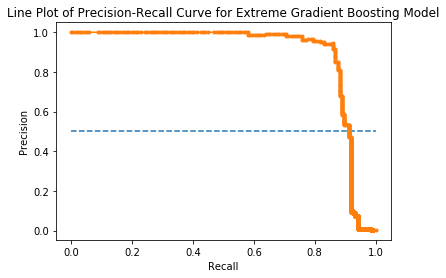

<Figure size 432x288 with 0 Axes>

In [285]:
# Extreme Gradient Boosting Model Precision-Recall AUC Score
# import auc & precision-recall curve from sklearn 

from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve   # Precision_Recall Curve for Imbalanced dataset

# Compute Extreme Gradient Boosting Model Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test,xgb_probs)

# Compute Extreme Gradient Boosting Model Precision-Recall AUC
# for Imbalanced dataset
xgb_auc = auc(recall,precision)

## Plot Extreme Gradient Boosting Model Precision-Recall Curve
from matplotlib import pyplot
plt.title('Line Plot of Precision-Recall Curve for Extreme Gradient Boosting Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
# plot no skill - a straight line at 0.5
pyplot.plot([0,1], [0.5,0.5], linestyle='--')

# Plot the Precision-Recall Curve for Extreme Gradient Boosting Model
pyplot.plot(recall,precision, marker='.')

# Display Precision-Recall Curve
pyplot.show()

plt.savefig('Extreme Gradient Boosting Model Precision-Recall Curve.pdf')

The above Precision-Recall Curve is a visual representation of Extreme Gradient Boosting Model performance. It shows the precision/recall for each threshold in comparison to a no skill model. 

## Extreme Gradient Boosting Model Precision-Recall AUC Score

In [210]:
# Display Extreme Gradient Boosting Model Precision-Recall AUC Score
print(xgb_auc)

0.8949761241404558


Extreme Gradient Boosting Model produced a precision-recall auc score of 0.89.

## Extreme Gradient Boosting Model Features importance

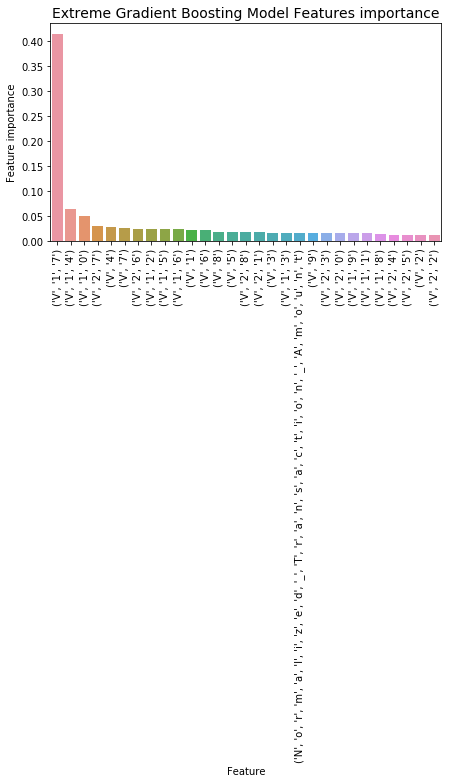

<Figure size 432x288 with 0 Axes>

In [341]:
# Visualize Extreme Gradient Boosting Model Features Importance
xgb_feature_imp = pd.DataFrame({'Feature': X, 'Feature importance': xgb_base_model.feature_importances_})
xgb_feature_imp = xgb_feature_imp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Extreme Gradient Boosting Model Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=xgb_feature_imp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   
plt.savefig('Extreme Gradient Boosting Model Features Importance.pdf')

The above result identifies features V17,V14,V10,V27 and V4 as the top five features that facilitate the classification of a transaction as either a non-fraudulent or fraudulent transaction by Extreme Gradient Boosting Model.

## Extreme Gradient Boosting (XGB) Classifier with Cross Validation

For Extreme Gradient Boosting Model, more than one split is done in cross-validation. Cross Validation would reveal consistency in performance of this algorithm and data or reveal inconsistency for further investigation.

In [211]:
# import cross validation score
from sklearn.model_selection import cross_val_score

In [212]:
# Compute Prediction scores for Extreme Gradient Boosting Classifier model on the dataset by splitting data into 5 folds 
# Calculating the score 5 consecutive times with different splits each time
# Extreme Gradient Boosting Classifier model with cross validation Evaluation Metrics - accuracy,precision,recall,f1-score,roc-auc
xgb_cross_val_accuracy = cross_val_score(xgb_base_model, X, y, cv=5, scoring='accuracy')
xgb_cross_val_precision = cross_val_score(xgb_base_model, X, y, cv=5, scoring='precision')
xgb_cross_val_recall = cross_val_score(xgb_base_model, X, y, cv=5, scoring='recall')
xgb_cross_val_f1 = cross_val_score(xgb_base_model, X, y, cv=5, scoring='f1')
xgb_cross_val_roc_auc = cross_val_score(xgb_base_model, X, y, cv=5, scoring='roc_auc')


In [213]:
# Display the 5 Accuracy Results for Extreme Gradient Boosting Model with Cross Validation
xgb_cross_val_accuracy

array([0.99908711, 0.99966644, 0.99891154, 0.99961377, 0.99945577])

In [214]:
# Display the 5 Precision Results for Extreme Gradient Boosting Model with Cross Validation
xgb_cross_val_precision

array([0.68503937, 0.98780488, 0.6875    , 0.95238095, 0.94666667])

In [215]:
# Display the 5 Recall Results for Extreme Gradient Boosting Model with Cross Validation
xgb_cross_val_recall

array([0.87878788, 0.81818182, 0.67346939, 0.81632653, 0.7244898 ])

In [216]:
# Display the 5 f1-Score Results for Extreme Gradient Boosting Model with Cross Validation
xgb_cross_val_f1

array([0.7699115 , 0.89502762, 0.68041237, 0.87912088, 0.82080925])

In [217]:
# Display the 5 Roc_Auc Results for Extreme Gradient Boosting Model with Cross Validation
xgb_cross_val_roc_auc

array([0.99063548, 0.98233651, 0.94604648, 0.99214385, 0.9818303 ])

## Extreme Gradient Boosting Model with Cross-Validation Performance Metrics

In [218]:
# Compute Extreme Gradient Boosting Model with Cross Validation Performance Metrics Mean and Standard Deviation
# Display the Evaluation Metrics for Extreme Gradient Boosting Classifier with Cross-Validation
print ("Average Evaluation of Extreme Gradient Boosting Classifier with 5-fold Cross-Validation:")
print('Accuracy: %0.3f (+/- %0.3f)' % (xgb_cross_val_accuracy.mean(), xgb_cross_val_accuracy.std()))
print('Precision: %0.3f (+/- %0.3f)' % (xgb_cross_val_precision.mean(), xgb_cross_val_precision.std()))
print('Recall: %0.3f (+/- %0.3f)' % (xgb_cross_val_recall.mean(), xgb_cross_val_recall.std()))
print('F1-Score: %0.3f (+/- %0.3f)' % (xgb_cross_val_f1.mean(), xgb_cross_val_f1.std()))
print('roc-auc: %0.3f (+/- %0.3f)' % (xgb_cross_val_roc_auc.mean(), xgb_cross_val_roc_auc.std()))

Average Evaluation of Extreme Gradient Boosting Classifier with 5-fold Cross-Validation:
Accuracy: 0.999 (+/- 0.000)
Precision: 0.852 (+/- 0.136)
Recall: 0.782 (+/- 0.073)
F1-Score: 0.809 (+/- 0.078)
roc-auc: 0.979 (+/- 0.017)


Extreme Gradient Boosting model with cross-validation produced precision score of 0.852, recall score of 0.782, F1-Score of 0.809 and ROC-AUC of 0.979 for this binary classification task.

## Extreme Gradient Boosting Model with Cross-Validation and Undersampling

Extreme Gradient Boosting Model would leverage cross-validation and undersampling techniques. Undersampling method is leveraged to handle the issue of imbalanced dataset. Cross-Validation is utilized to get an accurate performance of this model on the dataset through 5-fold splits.

In [219]:
# import cross validation score
from sklearn.model_selection import cross_val_score

In [220]:
# Compute Evaluation Metrics for Extreme Gradient Boosting model with Cross Validation and undersampling on the dataset by splitting data into 5 folds 
# Extreme Gradient Boosting model with cross validation and Undersampling Evaluation Metrics - accuracy,precision,recall,f1-score,roc-auc
xgb_undersampled_accuracy = cross_val_score(xgb_base_model, X_undersampled, y_undersampled, cv=5, scoring='accuracy')
xgb_undersampled_precision = cross_val_score(xgb_base_model, X_undersampled, y_undersampled, cv=5, scoring='precision')
xgb_undersampled_recall = cross_val_score(xgb_base_model, X_undersampled, y_undersampled, cv=5, scoring='recall')
xgb_undersampled_f1 = cross_val_score(xgb_base_model, X_undersampled, y_undersampled, cv=5, scoring='f1')
xgb_undersampled_roc_auc = cross_val_score(xgb_base_model, X_undersampled, y_undersampled, cv=5, scoring='roc_auc')

In [221]:
# Display the 5 Accuracy Results for Extreme Gradient Boosting Model with Cross Validation and Undersampling
xgb_undersampled_accuracy

array([0.96969697, 0.93939394, 0.90816327, 0.93877551, 0.92346939])

In [222]:
# Display the 5 Precision Results for Extreme Gradient Boosting Model with Cross Validation and Undersampling
xgb_undersampled_precision

array([0.97938144, 0.96774194, 0.96511628, 0.94791667, 0.95604396])

In [223]:
# Display the 5 Recall Results for Extreme Gradient Boosting Model with Cross Validation and Undersampling
xgb_undersampled_recall

array([0.95959596, 0.90909091, 0.84693878, 0.92857143, 0.8877551 ])

In [224]:
# Display the 5 f1-Score Results for Extreme Gradient Boosting Model with Cross Validation and Undersampling 
xgb_undersampled_f1

array([0.96938776, 0.9375    , 0.90217391, 0.93814433, 0.92063492])

In [225]:
# Display the 5 Roc_Auc Results for Extreme Gradient Boosting Model with Cross Validation and Undersampling
xgb_undersampled_roc_auc

array([0.99275584, 0.96806448, 0.95970429, 0.98646397, 0.97511454])

## Extreme Gradient Boosting with Cross-Validation and Undersampling Performance Metrics

In [226]:
# Compute Extreme Gradient Boosting Model with Cross Validation and undersampling Performance Metrics Mean and Standard Deviation 
# Display the Evaluation Metrics for Extreme Gradient Boosting Classifier with Cross-Validation and undersampling
print ("Average Evaluation Metrics of Extreme Gradient Boosting Classifier with Cross-Validation and Undersampling:")
print('Accuracy: %0.3f (+/- %0.3f)' % (xgb_undersampled_accuracy.mean(), xgb_undersampled_accuracy.std()))
print('Precision: %0.3f (+/- %0.3f)' % (xgb_undersampled_precision.mean(), xgb_undersampled_precision.std()))
print('Recall: %0.3f (+/- %0.3f)' % (xgb_undersampled_recall.mean(), xgb_undersampled_recall.std()))
print('F1-Score: %0.3f (+/- %0.3f)' % (xgb_undersampled_f1.mean(), xgb_undersampled_f1.std()))
print('roc-auc: %0.3f (+/- %0.3f)' % (xgb_undersampled_roc_auc.mean(), xgb_undersampled_roc_auc.std()))

Average Evaluation Metrics of Extreme Gradient Boosting Classifier with Cross-Validation and Undersampling:
Accuracy: 0.936 (+/- 0.020)
Precision: 0.963 (+/- 0.011)
Recall: 0.906 (+/- 0.038)
F1-Score: 0.934 (+/- 0.022)
roc-auc: 0.976 (+/- 0.012)


This model with cross-validation and undersampling produced an average accuracy score of 0.936, precision score of 0.963, recall score of 0.906, F1-Score of 0.934 and ROC-AUC of 0.976. 

## Extreme Gradient Boosting Model with Cross-Validation and Oversampling

Extreme Gradient Boosting Model would leverage cross-validation and oversampling techniques. Oversampling method is leveraged to handle the issue of imbalanced dataset. Cross-Validation is utilized to get an accurate performance of this model on the dataset through 5-fold splits.

In [227]:
# import cross validation score
from sklearn.model_selection import cross_val_score

In [228]:
# Compute Evaluation Metrics for Extreme Gradient Boosting model with Cross Validation and Oversampling on the dataset by splitting the data into 5 folds 
# Extreme Gradient Boosting Model with Cross Validation Evaluation Metrics - accuracy,precision,recall,f1-score,roc-auc

xgb_oversampled_accuracy = cross_val_score(xgb_base_model, X_oversampled, y_oversampled, cv=5, scoring='accuracy')
xgb_oversampled_precision = cross_val_score(xgb_base_model, X_oversampled, y_oversampled, cv=5, scoring='precision')
xgb_oversampled_recall = cross_val_score(xgb_base_model, X_oversampled, y_oversampled, cv=5, scoring='recall')
xgb_oversampled_f1 = cross_val_score(xgb_base_model, X_oversampled, y_oversampled, cv=5, scoring='f1')
xgb_oversampled_roc_auc = cross_val_score(xgb_base_model, X_oversampled, y_oversampled, cv=5, scoring='roc_auc')


In [229]:
# Display the 5 Accuracy Results for Extreme Gradient Boosting Model with Cross Validation and Oversampling
xgb_oversampled_accuracy

array([0.99949   , 0.99996483, 0.99966586, 0.99990328, 0.99995603])

In [230]:
# Display the 5 Precision Results for Extreme Gradient Boosting Model with Cross Validation and Oversampling
xgb_oversampled_precision

array([0.99898104, 0.99992966, 0.99933217, 0.99980659, 0.99991208])

In [231]:
# Display the 5 Recall Results for Extreme Gradient Boosting Model with Cross Validation and Oversampling
xgb_oversampled_recall

array([1., 1., 1., 1., 1.])

In [232]:
# Display the 5 f1-Score Results for Extreme Gradient Boosting Model with Cross Validation and Oversampling
xgb_oversampled_f1

array([0.99949026, 0.99996483, 0.99966598, 0.99990329, 0.99995604])

In [233]:
# Display the 5 Roc_Auc Results for Extreme Gradient Boosting Model with Cross Validation and Oversampling
xgb_oversampled_roc_auc

array([0.99970946, 1.        , 0.99994989, 1.        , 0.9999995 ])

## Extreme Gradient Boosting with Cross-Validation and Oversampling Performance Metrics

In [234]:
# Compute Extreme Gradient Boosting Model with Cross Validation and Oversampling Performance Metrics Mean and Standard Deviation 
# Display the Evaluation Metrics for Extreme Gradient Boosting Classifier with Cross-Validation and Oversampling
print ("Average Evaluation Metrics of Extreme Gradient Boosting Classifier with Cross-Validation and oversampling:")
print('Accuracy: %0.3f (+/- %0.3f)' % (xgb_oversampled_accuracy.mean(), xgb_oversampled_accuracy.std()))
print('Precision: %0.3f (+/- %0.3f)' % (xgb_oversampled_precision.mean(), xgb_oversampled_precision.std()))
print('Recall: %0.3f (+/- %0.3f)' % (xgb_oversampled_recall.mean(), xgb_oversampled_recall.std()))
print('F1-Score: %0.3f (+/- %0.3f)' % (xgb_oversampled_f1.mean(), xgb_oversampled_f1.std()))
print('roc-auc: %0.3f (+/- %0.3f)' % (xgb_oversampled_roc_auc.mean(), xgb_oversampled_roc_auc.std()))

Average Evaluation Metrics of Extreme Gradient Boosting Classifier with Cross-Validation and oversampling:
Accuracy: 1.000 (+/- 0.000)
Precision: 1.000 (+/- 0.000)
Recall: 1.000 (+/- 0.000)
F1-Score: 1.000 (+/- 0.000)
roc-auc: 1.000 (+/- 0.000)


This model when combined with both cross-validation and oversampling produced all round perfect performance metrics for this binary classification task.

## K NEAREST NEIGHBORS (KNN) Baseline Model

In [235]:
# Import KNN model and create its instance with n_neighbors=1
from sklearn.neighbors import KNeighborsClassifier
knn_base_model = KNeighborsClassifier(n_neighbors=4)

In [236]:
#  Fit the knn model on the training dataset
knn_base_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

## KNN Model Predictions

In [237]:
# Leverage Predict method to test the knn model
# Predict values for the testing data
knn_y_pred = knn_base_model.predict(X_test)

## K Nearest Neighbors (KNN) Model Prediction Probabilities

In [238]:
# K Nearest Neighbors (KNN) Model Prediction Probabilities
knn_probs = knn_base_model.predict_proba(X_test)

# Retain probabilities for the positive result only
knn_probs = knn_probs[:,1]

## KNN Model Evaluation - Classification report and Confusion Matrix

In [239]:
# Import classification_report and Generate a classification report 
# for the knn model
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.92      0.74      0.82       136

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.96      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



From the above Classification report, 0 class (Non-Fraudulent Transaction Class) is predicted with both 100% precision and recall whereas the 1 class (Fraudulent Transaction Class) has 92% precision. That means, this model is 92% correct when it predicts or classifies a transaction as Fraudulent. Furthermore, this model has a recall of 74%, that means the percentage or proportion of Fraudulent Transactions that are correctly identified as Fraudulent. That means, the probability of Fraudulent Transaction detection by this model is 74%. While f1-score of this model for Fraudulent Transaction is 0.82 or 82%.

In [240]:
# Import confusion matrix and generate confusion matrix 
# for baseline knn model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,knn_y_pred))

[[85298     9]
 [   35   101]]


The above confusion matrix depicts how this model is confused when it makes predictions. It provides a better understanding of the errors and the types of error (Type I or Type II error) being made by this classifier.  This project would focus more on the classification report for the models comparison.

## K Nearest Neighbors (KNN) Model Precision-Recall Curve

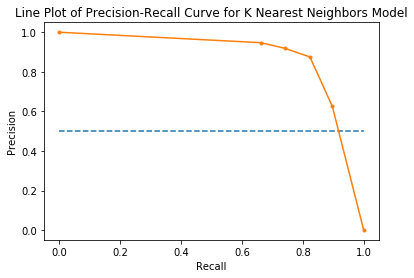

<Figure size 432x288 with 0 Axes>

In [286]:
# K Nearest Neighbors (KNN) Model Precision-Recall AUC Score
# import auc & precision-recall curve from sklearn
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve   # Precision_Recall Curve for Imbalanced dataset

# Compute K Nearest Neighbors Model Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test,knn_probs)

# Compute K Nearest Neighbors Model Precision-Recall AUC
# for Imbalanced dataset
knn_auc = auc(recall,precision)

## Plot K Nearest Neighbors(KNN) Model Precision-Recall Curve
from matplotlib import pyplot
plt.title('Line Plot of Precision-Recall Curve for K Nearest Neighbors Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
# plot no skill - a straight line at 0.5
pyplot.plot([0,1], [0.5,0.5], linestyle='--')

# Plot the Precision-Recall Curve for K Nearest Neighbors Model
pyplot.plot(recall,precision, marker='.')

# Display Precision-Recall Curve
pyplot.show()

plt.savefig('K Nearest Neighbors Model Precision-Recall Curve.pdf')

The above Precision-Recall Curve is a visual representation of K Nearest Neighbors Model performance. It shows the precision/recall for each threshold in comparison to a no skill model. 

##  K Nearest Neighbors (KNN) Model Precision-Recall AUC Score

In [242]:
# Display K Nearest Neighbors Model Precision-Recall AUC Score
print(knn_auc)

0.8797679375127065


K Nearest Neighbors(KNN) Model produced a precision-recall auc score of 0.88.

## K Nearest Neighbors Model Features importance

It worth noting that KNN Classifier has no features importance attribute. Hence, there is no need to generate features importance for KNN Classifier.

## K Nearest Neighbors (KNN) Classifier with Cross Validation

For K Nearest Neighbors Model, more than one split is done in cross-validation. Cross Validation would reveal consistency in performance of this algorithm and data or reveal inconsistency for further investigation.

In [243]:
# import cross validation score
from sklearn.model_selection import cross_val_score

In [244]:
# Compute Prediction scores for K Nearest Neighbors Classifier model on the dataset by splitting data into 5 folds 
# Calculating the score 5 consecutive times with different splits each time
# K Nearest Neighbors (KNN) Classifier model with cross validation Evaluation Metrics - accuracy,precision,recall,f1-score,roc-auc
knn_cross_val_accuracy = cross_val_score(knn_base_model, X, y, cv=5, scoring='accuracy')
knn_cross_val_precision = cross_val_score(knn_base_model, X, y, cv=5, scoring='precision')
knn_cross_val_recall = cross_val_score(knn_base_model, X, y, cv=5, scoring='recall')
knn_cross_val_f1 = cross_val_score(knn_base_model, X, y, cv=5, scoring='f1')
knn_cross_val_roc_auc = cross_val_score(knn_base_model, X, y, cv=5, scoring='roc_auc')

In [245]:
# Display the 5 Accuracy Results for K Nearest Neighbors Model with Cross Validation
knn_cross_val_accuracy

array([0.99898178, 0.99956111, 0.99878864, 0.99949088, 0.99942066])

In [246]:
# Display the 5 Precision Results for K Nearest Neighbors Model with Cross Validation
knn_cross_val_precision

array([0.66942149, 1.        , 0.69863014, 0.96      , 0.98507463])

In [247]:
# Display the 5 Recall Results for K Nearest Neighbors Model with Cross Validation
knn_cross_val_recall

array([0.81818182, 0.74747475, 0.52040816, 0.73469388, 0.67346939])

In [248]:
# Display the 5 f1-Score Results for K Nearest Neighbors Model with Cross Validation
knn_cross_val_f1

array([0.73636364, 0.85549133, 0.59649123, 0.83236994, 0.8       ])

In [249]:
# Display the 5 Roc_Auc Results for K Nearest Neighbors Model with Cross Validation
knn_cross_val_roc_auc

array([0.95912842, 0.89892844, 0.85074859, 0.91312103, 0.88258622])

## KNN Model with Cross-Validation Performance Metrics

In [250]:
# Compute K Nearest Neighbors (KNN) Model with Cross Validation Performance Metrics Mean and Standard Deviation
# Display the Evaluation Metrics for K Nearest Neighbors (KNN) Classifier with Cross-Validation
print ("Average Evaluation of K Nearest Neighbors (KNN) Classifier with 5-fold Cross-Validation:")
print('Accuracy: %0.3f (+/- %0.3f)' % (knn_cross_val_accuracy.mean(), knn_cross_val_accuracy.std()))
print('Precision: %0.3f (+/- %0.3f)' % (knn_cross_val_precision.mean(), knn_cross_val_precision.std()))
print('Recall: %0.3f (+/- %0.3f)' % (knn_cross_val_recall.mean(), knn_cross_val_recall.std()))
print('F1-Score: %0.3f (+/- %0.3f)' % (knn_cross_val_f1.mean(), knn_cross_val_f1.std()))
print('roc-auc: %0.3f (+/- %0.3f)' % (knn_cross_val_roc_auc.mean(), knn_cross_val_roc_auc.std()))

Average Evaluation of K Nearest Neighbors (KNN) Classifier with 5-fold Cross-Validation:
Accuracy: 0.999 (+/- 0.000)
Precision: 0.863 (+/- 0.147)
Recall: 0.699 (+/- 0.100)
F1-Score: 0.764 (+/- 0.093)
roc-auc: 0.901 (+/- 0.036)


K Nearest Neighbors (KNN) model with cross-validation produced precision score of 0.863, recall score of 0.699, F1-Score of 0.764 and ROC-AUC of 0.901 for this binary classification task.

## K Nearest Neighbors (KNN) Model with Cross-Validation and Undersampling

K Nearest Neighbors Model would leverage cross-validation and undersampling techniques. Undersampling method is leveraged to handle the issue of imbalanced dataset. Cross-Validation is utilized to get an accurate performance of this model on the dataset through 5-fold splits.

In [251]:
# import cross validation score
from sklearn.model_selection import cross_val_score

In [252]:
# Compute Evaluation Metrics for K Nearest Neighbors model with Cross Validation and undersampling on the dataset by splitting the data into 5 folds 
# K Nearest Neighbors model with cross validation and Undersampling Evaluation Metrics - accuracy,precision,recall,f1-score,roc-auc
knn_undersampled_accuracy = cross_val_score(knn_base_model, X_undersampled, y_undersampled, cv=5, scoring='accuracy')
knn_undersampled_precision = cross_val_score(knn_base_model, X_undersampled, y_undersampled, cv=5, scoring='precision')
knn_undersampled_recall = cross_val_score(knn_base_model, X_undersampled, y_undersampled, cv=5, scoring='recall')
knn_undersampled_f1 = cross_val_score(knn_base_model, X_undersampled, y_undersampled, cv=5, scoring='f1')
knn_undersampled_roc_auc = cross_val_score(knn_base_model, X_undersampled, y_undersampled, cv=5, scoring='roc_auc')


In [253]:
# Display the 5 Accuracy Results for K Nearest Neighbors Model with Cross Validation and Undersampling
knn_undersampled_accuracy

array([0.94949495, 0.93939394, 0.90306122, 0.94387755, 0.91836735])

In [254]:
# Display the 5 Precision Results for K Nearest Neighbors Model with Cross Validation and Undersampling
knn_undersampled_precision

array([0.96842105, 1.        , 1.        , 0.97802198, 0.97674419])

In [255]:
# Display the 5 Recall Results for K Nearest Neighbors Model with Cross Validation and Undersampling
knn_undersampled_recall

array([0.92929293, 0.87878788, 0.80612245, 0.90816327, 0.85714286])

In [256]:
# Display the 5 f1-Score Results for K Nearest Neighbors Model with Cross Validation and Undersampling 
knn_undersampled_f1

array([0.94845361, 0.93548387, 0.89265537, 0.94179894, 0.91304348])

In [257]:
# Display the 5 Roc_Auc Results for K Nearest Neighbors Model with Cross Validation and Undersampling
knn_undersampled_roc_auc

array([0.97158453, 0.95699418, 0.93294461, 0.98729696, 0.95533111])

## KNN Model with Cross-Validation and Undersampling Performance Metrics

In [258]:
# Compute K Nearest Neighbors Model with Cross Validation and undersampling Performance Metrics Mean and Standard Deviation 
# Display the Evaluation Metrics for K Nearest Neighbors Classifier with Cross-Validation and undersampling
print ("Average Evaluation Metrics of K Nearest Neighbors Classifier with Cross-Validation and Undersampling:")
print('Accuracy: %0.3f (+/- %0.3f)' % (knn_undersampled_accuracy.mean(), knn_undersampled_accuracy.std()))
print('Precision: %0.3f (+/- %0.3f)' % (knn_undersampled_precision.mean(), knn_undersampled_precision.std()))
print('Recall: %0.3f (+/- %0.3f)' % (knn_undersampled_recall.mean(), knn_undersampled_recall.std()))
print('F1-Score: %0.3f (+/- %0.3f)' % (knn_undersampled_f1.mean(), knn_undersampled_f1.std()))
print('roc-auc: %0.3f (+/- %0.3f)' % (knn_undersampled_roc_auc.mean(), knn_undersampled_roc_auc.std()))

Average Evaluation Metrics of K Nearest Neighbors Classifier with Cross-Validation and Undersampling:
Accuracy: 0.931 (+/- 0.017)
Precision: 0.985 (+/- 0.013)
Recall: 0.876 (+/- 0.043)
F1-Score: 0.926 (+/- 0.021)
roc-auc: 0.961 (+/- 0.018)


This model with cross-validation and undersampling produced an average accurary score of 0.931, precision score of 0.985, recall score of 0.876, F1-Score of 0.926 and ROC-AUC of 0.961. 

## K Nearest Neighbors (KNN) Model with Cross-Validation and Oversampling

K Nearest Neighbors Model would leverage cross-validation and oversampling techniques. Oversampling method is leveraged to handle the issue of imbalanced dataset. Cross-Validation is utilized to get an accurate performance of this model on the dataset through 5-fold splits.

In [259]:
# import cross validation score
from sklearn.model_selection import cross_val_score

In [260]:
# Compute Evaluation Metrics for K Nearest Neighbors (KNN) model with Cross Validation and Oversampling on the dataset by splitting the data into 5 folds 
# K Nearest Neighbors (KNN) Model with Cross Validation Evaluation Metrics - accuracy,precision,recall,f1-score,roc-auc

knn_oversampled_accuracy = cross_val_score(knn_base_model, X_oversampled, y_oversampled, cv=5, scoring='accuracy')
knn_oversampled_precision = cross_val_score(knn_base_model, X_oversampled, y_oversampled, cv=5, scoring='precision')
knn_oversampled_recall = cross_val_score(knn_base_model, X_oversampled, y_oversampled, cv=5, scoring='recall')
knn_oversampled_f1 = cross_val_score(knn_base_model, X_oversampled, y_oversampled, cv=5, scoring='f1')
knn_oversampled_roc_auc = cross_val_score(knn_base_model, X_oversampled, y_oversampled, cv=5, scoring='roc_auc')

In [261]:
# Display the 5 Accuracy Results for K Nearest Neighbors (KNN) Model with Cross Validation and Oversampling
knn_oversampled_accuracy

array([0.99857552, 0.99977138, 0.99779294, 0.99968345, 0.99978017])

In [262]:
# Display the 5 Precision Results for K Nearest Neighbors (KNN) Model with Cross Validation and Oversampling
knn_oversampled_precision

array([0.99715914, 0.99954297, 0.99560528, 0.9993673 , 0.99956054])

In [263]:
# Display the 5 Recall Results for K Nearest Neighbors (KNN) Model with Cross Validation and Oversampling
knn_oversampled_recall

array([1., 1., 1., 1., 1.])

In [264]:
# Display the 5 f1-Score Results for K Nearest Neighbors (KNN) Model with Cross Validation and Oversampling
knn_oversampled_f1

array([0.99857755, 0.99977143, 0.9977978 , 0.99968355, 0.99978022])

In [265]:
# Display the 5 Roc_Auc Results for K Nearest Neighbors (KNN) Model with Cross Validation and Oversampling
knn_oversampled_roc_auc

array([0.99892725, 0.99992086, 0.99805673, 0.99985052, 0.99984172])

## KNN Model with Cross-Validation and Oversampling Performance Metrics

In [266]:
# Compute K Nearest Neighbors (KNN) Model with Cross Validation and Oversampling Performance Metrics Mean and Standard Deviation 
# Display the Evaluation Metrics for Random Forest Classifier with Cross-Validation and Oversampling
print ("Average Evaluation Metrics of Random Forest Classifier with Cross-Validation and oversampling:")
print('Accuracy: %0.3f (+/- %0.3f)' % (knn_oversampled_accuracy.mean(), knn_oversampled_accuracy.std()))
print('Precision: %0.3f (+/- %0.3f)' % (knn_oversampled_precision.mean(), knn_oversampled_precision.std()))
print('Recall: %0.3f (+/- %0.3f)' % (knn_oversampled_recall.mean(), knn_oversampled_recall.std()))
print('F1-Score: %0.3f (+/- %0.3f)' % (knn_oversampled_f1.mean(), knn_oversampled_f1.std()))
print('roc-auc: %0.3f (+/- %0.3f)' % (knn_oversampled_roc_auc.mean(), knn_oversampled_roc_auc.std()))

Average Evaluation Metrics of Random Forest Classifier with Cross-Validation and oversampling:
Accuracy: 0.999 (+/- 0.001)
Precision: 0.998 (+/- 0.002)
Recall: 1.000 (+/- 0.000)
F1-Score: 0.999 (+/- 0.001)
roc-auc: 0.999 (+/- 0.001)


This model with cross-validation and oversampling produced precision score of 0.998, recall score of 1.000, F1-Score of 0.999 and ROC-AUC of 0.999 for this binary classification task. 

## Conclusions


⦁	In this project, five classification predictive models leveraging Linear Regression, Decision Tree, Random Forest, Extreme Gradient Boosting and K Nearest Neighbors (KNN) were developed for credit card fraud detection.

⦁	Most of the transactions in the dataset are Non-Fraudulent while only very few transactions are Fraudulent Transactions. Hence, the dataset has an imbalanced transaction class distribution.

⦁	For the imbalanced data with single 70/30 train to test ratio split, Extreme Gradient Boosting model produced the best result with precision score of 0.95, Recall score of 0.82, F1-Score of 0.88 and Precision-Recall AUC score of 0.89 for the Fraudulent Transaction Class.

⦁	Extreme Gradient Boosting model also produced the best Precision-Recall curve among the five models' precision-recall curves for the imbalanced data.

⦁	For the balanced data with cross validation and undersampling, Logistic Regression Model produced the best result with accuracy of 0.939, precision score of 0.968, recall score of 0.908, F1-Score of 0.937 and ROC-AUC of 0.978.

⦁	Balanced dataset was produced through resampling techniques including undersampling and oversampling.

⦁	For the balanced data with cross validation and undersampling, Logistic Regression Model produced the best result with accuracy of 0.939, precision score of 0.968, recall score of 0.908, F1-Score of 0.937 and ROC-AUC of 0.978.

⦁	For the balanced data with cross validation and oversampling, all the five models produced their best performance results in comparison with results obtained from the single split, cross-validation and cross validation with undersampling.

⦁	For balanced data with cross validation and oversampling, both random forest and extreme gradient boosting models produced perfect performance results. Hence, there is a tie between the two models.

⦁	From the results obtained from this project, my recommended solution for this credit card fraud detection is to go with balanced data leveraging both cross validation and oversampling with Random Forest model as my first choice and Extreme Gradient Boosting model as my second choice.


## Future Work

Future work on this project would involve utilizing unsupervised learning methods to perform credit card fraud detection. It would be interesting to see how the performance of unsupervised learning methods would compare with the supervised learning methods’ results obtained in this project.

Furthermore, I would like to learn if better performance results can be obtained with the utilization of other resampling techniques including SMOTE (Synthetic Minority Over-sampling Technique) combined with cross-validation.
